<font size="4"> <b> • DOMAIN: </b>Semiconductor manufacturing process</font>

<font size="4"> <b> • CONTEXT: </b> A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals / variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant  information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.</font> 

<font size="4"> <b> • DATA DESCRIPTION: </b>sensor-data.csv : (1567, 592)
    
The data consists of 1567 examples each with 591 features.The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

<font size="4"> <b> • PROJECT OBJECTIVE: </b> We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.</font>
    
<font size="4">Steps and tasks: [ Total Score: 60 points]
  
1. Import and warehouse data: 
    
2. Data cleansing: 
    
> Missing value treatment.
    
> Drop attribute/s if required using relevant functional knowledge.
    
> Make all relevant modifications on the data using both functional/logical reasoning/assumptions
    
3. Data analysis & visualisation: 
    
> Perform detailed relevant statistical analysis on the data.
    
> Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.
    
4. Data pre-processing:
    
> Segregate predictors vs target attributes
    
> Check for target balancing and fix it if found imbalanced.
    
> Perform train-test split and standardise the data or vice versa if required.
    
> Check if the train and test data have similar statistical characteristics when compared with original data.
    
5. Model training, testing and tuning: 
    
- Model training:
    
> Pick up a supervised learning model.
    
> Train the model.
    
> Use cross validation techniques.
    
> Hint: Use all CV techniques that you have learnt in the course.
    
> Apply hyper-parameter tuning techniques to get the best accuracy.
    
> Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
    
> Use any other technique/method which can enhance the model performance.
    
> Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.
    
> Display and explain the classification report in detail.
    
> Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to new train and test accuracies.
    
> Hint: You can use your concepts learnt under Applied Statistics module.
    
> Apply the above steps for all possible models that you have learnt so far.
    
- Display and compare all the models designed with their train and test accuracies.
    
- Select the final best trained model along with your detailed comments for selecting this model.
    
- Pickle the selected model for future use.
    
- Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results.
    
6. Conclusion and improvisation: 
    
> Write your conclusion on the results.

</font>
 

### Answer: 

In [1]:
# importing functions

import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<font size="5"><p style="color:black"> <b> 1. Import and explore the data:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">1.1 Import all the given datasets. Explore shape and size.

In [2]:
data = pd.read_csv('signal-data.csv')

In [3]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
print('Shape:',data.shape,'\n\n','Size:',data.size)

Shape: (1567, 592) 

 Size: 927664


<font size="5"><p style="color:black"> <b> 2. Data cleansing:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.1 Missing value treatment.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.1 Checking for Duplicated Records

In [5]:
# Identify duplicates records in the data
dupe = data.duplicated()
sum(dupe)

0

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.2 Checking for Duplicated Indexes

In [6]:
data.index.is_unique

True

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.3 Checking for Missing Values

##### Checking for missing values 

In [7]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
158,1429,0.911934
292,1429,0.911934
293,1429,0.911934
157,1429,0.911934
85,1341,0.855775
...,...,...
386,0,0.000000
361,0,0.000000
360,0,0.000000
359,0,0.000000


In [8]:
data.isnull().sum().sum()

41951

In [9]:
data.shape

(1567, 592)

##### Dropping columns over a threshold of 60%

In [10]:
data1 = data.copy()

In [11]:
data1 = data1.dropna(axis='columns', thresh = int(0.60 * len(data1)))

In [12]:
data1.isnull().sum().sum()

8823

In [13]:
data1.shape

(1567, 560)

##### Replacing all NaN values with Median values

In [14]:
Time = data1['Time']

In [15]:
data2 = data1.drop('Time',axis = 1)

In [16]:
for feature in data2.columns:
    data2[feature].fillna(0,inplace=True)    
    data2[feature].replace(0,data2[feature].median(),inplace=True)

In [17]:
data2.isnull().sum().sum()

0

In [18]:
data2.shape

(1567, 559)

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.2 Drop attribute/s if required using relevant functional knowledge.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.1 Dropping attributes with 0 (zero) standard deviation

In [19]:
count = 0
data4 = data2.copy()
dropz = []
for feature in data4.columns:
    if data4[feature].std()==0:
        data4.drop([feature],axis = 1, inplace = True)
        dropz.append(feature)
        count = count + 1
print("Columns with STD of zero is: ",count)

Columns with STD of zero is:  116


In [20]:
data4.shape

(1567, 443)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.2.2 Dropping attributes with high coefficient of variation

In [21]:
dropx = []
data5 = data4.copy()
import scipy.stats
count=0
for feature in data5.columns[:-1]:
    p=scipy.stats.variation(data5[feature], axis = 0)
    if p<=1:
        data5.drop([feature],axis=1,inplace=True)
        dropx.append(feature)
        count=count+1
        
print("Columns with coefficient of variation less than 1 that were removed are: ",count)

Columns with coefficient of variation less than 1 that were removed are:  338


In [22]:
data5.shape

(1567, 105)

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.3 Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.3.1 Creating new attribute 'Date' from 'Time' attribute by slicing strings

In [23]:
df = pd.merge(data5, Time, left_index=True, right_index=True)
df.head()

,4,10,59,67,74,79,82,91,92,95,...,551,554,557,572,574,576,583,585,Pass/Fail,Time
0,1.3602,-0.0034,-1.7264,0.9226,0.0,-0.0083,-0.0044,-0.3274,-0.0055,0.0003,...,0.78,0.3363,1.0297,8.95,3.0624,1.6765,0.0118,2.3630,-1,2008-07-19 11:55:00
1,0.8294,-0.0148,0.8073,1.1598,0.0,-0.0358,0.0017,0.1455,-0.0015,0.0001,...,1.33,0.4989,1.7819,5.92,2.0111,1.1065,0.0223,4.4447,-1,2008-07-19 12:32:00
2,1.5102,0.0013,23.8245,0.8694,0.0,-0.0054,0.0287,0.0553,0.0006,0.0002,...,0.85,0.3752,1.1386,11.21,4.0923,2.0952,0.0157,3.1745,1,2008-07-19 13:17:00
3,1.3204,-0.0033,24.3791,0.9761,0.0,0.0676,0.0277,0.0697,-0.0003,0.0002,...,39.33,17.4781,54.2917,9.33,2.8971,1.7585,0.0103,2.0544,-1,2008-07-19 14:43:00
4,1.5334,-0.0072,-12.2945,0.9256,0.0,0.0034,-0.0048,0.0448,-0.0077,-0.0001,...,1.98,0.8311,2.5014,8.83,3.1776,1.6597,0.4766,99.3032,-1,2008-07-19 15:22:00


In [24]:
df1 = df.copy()
df1['Date'] = df1['Time'].str[:10]
df1['Time'] = df1['Time'].str[11:]
df1.head()

,4,10,59,67,74,79,82,91,92,95,...,554,557,572,574,576,583,585,Pass/Fail,Time,Date
0,1.3602,-0.0034,-1.7264,0.9226,0.0,-0.0083,-0.0044,-0.3274,-0.0055,0.0003,...,0.3363,1.0297,8.95,3.0624,1.6765,0.0118,2.3630,-1,11:55:00,2008-07-19
1,0.8294,-0.0148,0.8073,1.1598,0.0,-0.0358,0.0017,0.1455,-0.0015,0.0001,...,0.4989,1.7819,5.92,2.0111,1.1065,0.0223,4.4447,-1,12:32:00,2008-07-19
2,1.5102,0.0013,23.8245,0.8694,0.0,-0.0054,0.0287,0.0553,0.0006,0.0002,...,0.3752,1.1386,11.21,4.0923,2.0952,0.0157,3.1745,1,13:17:00,2008-07-19
3,1.3204,-0.0033,24.3791,0.9761,0.0,0.0676,0.0277,0.0697,-0.0003,0.0002,...,17.4781,54.2917,9.33,2.8971,1.7585,0.0103,2.0544,-1,14:43:00,2008-07-19
4,1.5334,-0.0072,-12.2945,0.9256,0.0,0.0034,-0.0048,0.0448,-0.0077,-0.0001,...,0.8311,2.5014,8.83,3.1776,1.6597,0.4766,99.3032,-1,15:22:00,2008-07-19


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.3.2 Creating a numerical dataset

In [25]:
dfnum = df1.drop(['Time','Date','Pass/Fail'],axis=1)

In [26]:
dfnum

,4,10,59,67,74,79,82,91,92,95,...,524,549,551,554,557,572,574,576,583,585
0,1.3602,-0.0034,-1.7264,0.9226,0.0,-0.0083,-0.0044,-0.3274,-0.0055,0.0003,...,4.8560,0.4234,0.78,0.3363,1.0297,8.95,3.0624,1.6765,0.0118,2.3630
1,0.8294,-0.0148,0.8073,1.1598,0.0,-0.0358,0.0017,0.1455,-0.0015,0.0001,...,6.6475,0.7193,1.33,0.4989,1.7819,5.92,2.0111,1.1065,0.0223,4.4447
2,1.5102,0.0013,23.8245,0.8694,0.0,-0.0054,0.0287,0.0553,0.0006,0.0002,...,7.0870,0.1832,0.85,0.3752,1.1386,11.21,4.0923,2.0952,0.0157,3.1745
3,1.3204,-0.0033,24.3791,0.9761,0.0,0.0676,0.0277,0.0697,-0.0003,0.0002,...,5.4751,1.8804,39.33,17.4781,54.2917,9.33,2.8971,1.7585,0.0103,2.0544
4,1.5334,-0.0072,-12.2945,0.9256,0.0,0.0034,-0.0048,0.0448,-0.0077,-0.0001,...,4.4146,1.0388,1.98,0.8311,2.5014,8.83,3.1776,1.6597,0.4766,99.3032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1.4843,-0.0057,2.8182,0.9923,0.0,0.0000,0.0067,0.1671,0.0002,0.0000,...,6.0178,1.1040,0.80,0.3141,1.0367,7.98,2.6401,1.4879,0.0143,2.8669
1563,0.8763,-0.0093,-3.3555,0.4904,0.0,0.0000,0.0067,-0.3570,-0.0055,0.0001,...,4.6482,0.2235,1.33,0.5058,1.8156,5.48,1.9077,1.0187,0.0131,2.6238
1564,0.8236,0.0004,1.1664,0.9078,0.0,0.0000,0.0067,-0.0223,0.0034,0.0000,...,6.2114,0.6671,1.50,0.5605,2.0228,6.49,2.1760,1.2237,0.0153,3.0590
1565,1.5726,0.0032,4.4682,0.9981,0.0,0.0000,0.0067,0.1759,-0.0036,0.0001,...,6.6428,0.2235,1.33,0.5058,1.8156,9.13,3.2524,1.7085,0.0178,3.5662


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.3.3 Normalizing/Scaling dataset

In [27]:
dfscaled = dfnum.copy()

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler() # define the scaler
dfscaled = pd.DataFrame(sc.fit_transform(dfscaled)) # fit & transform the data
dfscaled

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.000609,0.358362,0.138291,0.000070,0.0,0.306768,0.584689,0.041128,0.174447,0.666667,...,0.004341,0.053952,0.016832,0.016315,0.015983,0.011995,0.011971,0.011285,0.012325,0.011880
1,0.000133,0.228669,0.151144,0.000103,0.0,0.132827,0.601795,0.698208,0.272727,0.555556,...,0.006535,0.096097,0.030859,0.025645,0.029880,0.005277,0.005750,0.004934,0.034637,0.033099
2,0.000744,0.411832,0.267903,0.000063,0.0,0.325111,0.677510,0.572878,0.324324,0.611111,...,0.007073,0.019741,0.018618,0.018547,0.017995,0.017006,0.018066,0.015949,0.020612,0.020152
3,0.000574,0.359499,0.270716,0.000077,0.0,0.786844,0.674706,0.592886,0.302211,0.611111,...,0.005099,0.261473,1.000000,1.000000,1.000000,0.012838,0.010993,0.012198,0.009137,0.008734
4,0.000765,0.315131,0.084682,0.000070,0.0,0.380772,0.583567,0.558288,0.120393,0.444444,...,0.003801,0.141604,0.047437,0.044709,0.043172,0.011729,0.012653,0.011097,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.000721,0.332196,0.161344,0.000080,0.0,0.359266,0.615816,0.728220,0.314496,0.500000,...,0.005764,0.150890,0.017343,0.015041,0.016112,0.009844,0.009472,0.009183,0.017637,0.017016
1563,0.000175,0.291240,0.130027,0.000011,0.0,0.359266,0.615816,0.000000,0.174447,0.555556,...,0.004087,0.025481,0.030859,0.026041,0.030502,0.004301,0.005138,0.003956,0.015087,0.014538
1564,0.000128,0.401593,0.152965,0.000068,0.0,0.359266,0.615816,0.465055,0.393120,0.500000,...,0.006001,0.088663,0.035195,0.029180,0.034330,0.006541,0.006726,0.006240,0.019762,0.018974
1565,0.000800,0.433447,0.169714,0.000080,0.0,0.359266,0.615816,0.740447,0.221130,0.555556,...,0.006529,0.025481,0.030859,0.026041,0.030502,0.012394,0.013096,0.011641,0.025074,0.024144


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.3.4 Creating a categorical dataset

In [29]:
dfcat = df1[['Pass/Fail','Time','Date']]
dfcat['Pass/Fail'] = dfcat['Pass/Fail'].replace({-1: 'Fail', 1: 'Pass'})
dfcat

<ipython-input-29-2c36cefc442f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat['Pass/Fail'] = dfcat['Pass/Fail'].replace({-1: 'Fail', 1: 'Pass'})


,Pass/Fail,Time,Date
0,Fail,11:55:00,2008-07-19
1,Fail,12:32:00,2008-07-19
2,Pass,13:17:00,2008-07-19
3,Fail,14:43:00,2008-07-19
4,Fail,15:22:00,2008-07-19
...,...,...,...
1562,Fail,15:13:00,2008-10-16
1563,Fail,20:49:00,2008-10-16
1564,Fail,05:26:00,2008-10-17
1565,Fail,06:01:00,2008-10-17


In [30]:
dfcat['Month'] = dfcat['Date'].str[5:-3]
dfcat

<ipython-input-30-aee8c7c5aa35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat['Month'] = dfcat['Date'].str[5:-3]


,Pass/Fail,Time,Date,Month
0,Fail,11:55:00,2008-07-19,07
1,Fail,12:32:00,2008-07-19,07
2,Pass,13:17:00,2008-07-19,07
3,Fail,14:43:00,2008-07-19,07
4,Fail,15:22:00,2008-07-19,07
...,...,...,...,...
1562,Fail,15:13:00,2008-10-16,10
1563,Fail,20:49:00,2008-10-16,10
1564,Fail,05:26:00,2008-10-17,10
1565,Fail,06:01:00,2008-10-17,10


In [31]:
dfcat['Month'] = dfcat['Month'].str.replace('01','January', regex=True)
dfcat['Month'] = dfcat['Month'].str.replace('02','February', regex=True)
dfcat['Month'] = dfcat['Month'].str.replace('03','March', regex=True)
dfcat['Month'] = dfcat['Month'].str.replace('04','April', regex=True)
dfcat['Month'] = dfcat['Month'].str.replace('05','May', regex=True)
dfcat['Month'] = dfcat['Month'].str.replace('06','June', regex=True)
dfcat['Month'] = dfcat['Month'].str.replace('07','July', regex=True)
dfcat['Month'] = dfcat['Month'].str.replace('08','August', regex=True)
dfcat['Month'] = dfcat['Month'].str.replace('09','September', regex=True)
dfcat['Month'] = dfcat['Month'].str.replace('10','October', regex=True)
dfcat['Month'] = dfcat['Month'].str.replace('11','November', regex=True)
dfcat['Month'] = dfcat['Month'].str.replace('12','December', regex=True)
dfcat

<ipython-input-31-e692e6576180>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat['Month'] = dfcat['Month'].str.replace('01','January', regex=True)
<ipython-input-31-e692e6576180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat['Month'] = dfcat['Month'].str.replace('02','February', regex=True)
<ipython-input-31-e692e6576180>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Pass/Fail,Time,Date,Month
0,Fail,11:55:00,2008-07-19,July
1,Fail,12:32:00,2008-07-19,July
2,Pass,13:17:00,2008-07-19,July
3,Fail,14:43:00,2008-07-19,July
4,Fail,15:22:00,2008-07-19,July
...,...,...,...,...
1562,Fail,15:13:00,2008-10-16,October
1563,Fail,20:49:00,2008-10-16,October
1564,Fail,05:26:00,2008-10-17,October
1565,Fail,06:01:00,2008-10-17,October


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.3.5 Creating a Combined dataset 

In [32]:
dfcombined = pd.merge(dfnum,dfcat,left_index=True, right_index=True)
dfcombined

,4,10,59,67,74,79,82,91,92,95,...,557,572,574,576,583,585,Pass/Fail,Time,Date,Month
0,1.3602,-0.0034,-1.7264,0.9226,0.0,-0.0083,-0.0044,-0.3274,-0.0055,0.0003,...,1.0297,8.95,3.0624,1.6765,0.0118,2.3630,Fail,11:55:00,2008-07-19,July
1,0.8294,-0.0148,0.8073,1.1598,0.0,-0.0358,0.0017,0.1455,-0.0015,0.0001,...,1.7819,5.92,2.0111,1.1065,0.0223,4.4447,Fail,12:32:00,2008-07-19,July
2,1.5102,0.0013,23.8245,0.8694,0.0,-0.0054,0.0287,0.0553,0.0006,0.0002,...,1.1386,11.21,4.0923,2.0952,0.0157,3.1745,Pass,13:17:00,2008-07-19,July
3,1.3204,-0.0033,24.3791,0.9761,0.0,0.0676,0.0277,0.0697,-0.0003,0.0002,...,54.2917,9.33,2.8971,1.7585,0.0103,2.0544,Fail,14:43:00,2008-07-19,July
4,1.5334,-0.0072,-12.2945,0.9256,0.0,0.0034,-0.0048,0.0448,-0.0077,-0.0001,...,2.5014,8.83,3.1776,1.6597,0.4766,99.3032,Fail,15:22:00,2008-07-19,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1.4843,-0.0057,2.8182,0.9923,0.0,0.0000,0.0067,0.1671,0.0002,0.0000,...,1.0367,7.98,2.6401,1.4879,0.0143,2.8669,Fail,15:13:00,2008-10-16,October
1563,0.8763,-0.0093,-3.3555,0.4904,0.0,0.0000,0.0067,-0.3570,-0.0055,0.0001,...,1.8156,5.48,1.9077,1.0187,0.0131,2.6238,Fail,20:49:00,2008-10-16,October
1564,0.8236,0.0004,1.1664,0.9078,0.0,0.0000,0.0067,-0.0223,0.0034,0.0000,...,2.0228,6.49,2.1760,1.2237,0.0153,3.0590,Fail,05:26:00,2008-10-17,October
1565,1.5726,0.0032,4.4682,0.9981,0.0,0.0000,0.0067,0.1759,-0.0036,0.0001,...,1.8156,9.13,3.2524,1.7085,0.0178,3.5662,Fail,06:01:00,2008-10-17,October


<font size="5"><p style="color:black"> <b> 3. Data analysis & visualisation:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">3.1 Perform detailed relevant statistical analysis on the data.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.1 Mean, Median and Mode

In [33]:
dfnum.mean() # Mean of each attribute.

4       4.171221
10      0.000148
59      2.951079
67     16.655180
74      0.002677
         ...    
572    28.450165
574     9.162315
576     5.563747
583     0.015317
585     3.067628
Length: 104, dtype: float64

In [34]:
dfnum.median() # Mean of each attribute.

4      1.3101
10     0.0004
59     0.9091
67     0.9767
74     0.0000
        ...  
572    8.6500
574    2.9758
576    1.6245
583    0.0138
585    2.7576
Length: 104, dtype: float64

In [35]:
dfnum.mode() # Mean of each attribute.

,4,10,59,67,74,79,82,91,92,95,...,524,549,551,554,557,572,574,576,583,585
0,1.3101,0.0004,0.9091,0.9767,0.0,0.0,0.0067,0.0,0.0004,0.0,...,2.2343,0.3808,1.02,0.4172,1.3605,9.01,2.6691,1.4926,0.0111,1.9589
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4630,NaN,NaN,NaN,NaN,NaN,3.7983,2.0444,0.0115,2.4101
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0118,2.7619
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.6354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.6737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.7670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.7779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.2 Quantile 25%, 50% and 75%

In [36]:
dfnum.quantile(q=0.25)

4      1.01770
10    -0.00560
59    -1.85545
67     0.89150
74     0.00000
        ...   
572    7.50000
574    2.56785
576    1.40845
583    0.01160
585    2.30650
Name: 0.25, Length: 104, dtype: float64

In [37]:
dfnum.quantile(q=0.50)

4      1.3101
10     0.0004
59     0.9091
67     0.9767
74     0.0000
        ...  
572    8.6500
574    2.9758
576    1.6245
583    0.0138
585    2.7576
Name: 0.5, Length: 104, dtype: float64

In [38]:
dfnum.quantile(q=0.75)

4       1.51880
10      0.00590
59      4.33770
67      1.06490
74      0.00000
         ...   
572    10.13000
574     3.49250
576     1.90200
583     0.01650
585     3.29495
Name: 0.75, Length: 104, dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.3 Min, Max, Variance, Standard Deviation, Covariance, and Correlation

In [39]:
dfnum.min(numeric_only = True) # Minimum Values

4       0.6815
10     -0.0349
59    -28.9882
67      0.4137
74      0.0000
        ...   
572     3.5400
574     1.0395
576     0.6636
583     0.0060
585     1.1975
Length: 104, dtype: float64

In [40]:
dfnum.max(numeric_only = True) # Maximum values

4      1114.5366
10        0.0530
59      168.1455
67     7272.8283
74        4.1955
         ...    
572     454.5600
574     170.0204
576      90.4235
583       0.4766
585      99.3032
Length: 104, dtype: float64

In [41]:
dfnum.var(numeric_only = True) #Variance

4       3147.627858
10         0.000086
59        90.475775
67     94196.315794
74         0.011233
           ...     
572     7448.498015
574      724.694496
576      286.332719
583        0.000295
585       12.794207
Length: 104, dtype: float64

In [42]:
dfnum.std(numeric_only = True) #Standard Deviation

4       56.103724
10       0.009296
59       9.511875
67     306.914183
74       0.105986
          ...    
572     86.304681
574     26.920150
576     16.921369
583      0.017174
585      3.576899
Length: 104, dtype: float64

In [43]:
dfnum.cov() #Covariance

,4,10,59,67,74,79,82,91,92,95,...,524,549,551,554,557,572,574,576,583,585
4,3147.627858,-0.003394,-10.934973,-50.197376,-0.005737,-0.072460,-0.029235,-0.100005,2.086484e-03,-9.885158e-05,...,1.695483,-0.446716,-0.776311,-0.373745,-0.892931,-57.706049,-18.361538,-11.445079,-0.001282,-0.330085
10,-0.003394,0.000086,0.007525,0.053369,-0.000014,0.000021,0.000013,-0.000012,-4.289491e-07,5.592932e-08,...,-0.001911,0.000102,0.000156,0.000065,0.000206,0.037830,0.012075,0.007099,0.000006,0.001316
59,-10.934973,0.007525,90.475775,1389.325058,-0.015401,0.076054,-0.013200,0.011572,1.155077e-03,1.100479e-04,...,-0.370511,0.204549,1.135501,0.524987,1.467824,-12.932694,-3.926425,-1.008651,-0.004513,-0.951002
67,-50.197376,0.053369,1389.325058,94196.315794,2.393160,0.073503,-0.057816,0.261305,2.874568e-02,-1.239533e-04,...,93.421007,-1.150183,1.287974,0.197712,1.835148,1299.223277,341.564369,247.166304,0.050498,10.515745
74,-0.005737,-0.000014,-0.015401,2.393160,0.011233,-0.000077,-0.000020,-0.000070,-7.806032e-06,3.756237e-07,...,0.002962,-0.001053,0.000360,0.000044,0.000633,-0.055405,-0.017313,-0.010998,-0.000003,-0.000632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,-57.706049,0.037830,-12.932694,1299.223277,-0.055405,-0.003410,0.170337,0.201623,-1.010315e-02,2.660852e-04,...,-12.725875,-1.625258,-0.899976,-0.583615,-1.024333,7448.498015,2308.672286,1452.758610,-0.025773,-5.309319
574,-18.361538,0.012075,-3.926425,341.564369,-0.017313,-0.002065,0.056715,0.054651,-3.381179e-03,8.010437e-05,...,-4.082709,-0.523448,-0.310261,-0.196191,-0.356456,2308.672286,724.694496,451.762299,-0.007870,-1.621200
576,-11.445079,0.007099,-1.008651,247.166304,-0.010998,0.000635,0.034761,0.031487,-1.858980e-03,4.975570e-05,...,-2.546644,-0.350818,-0.185832,-0.117756,-0.215336,1452.758610,451.762299,286.332719,-0.005040,-1.039606
583,-0.001282,0.000006,-0.004513,0.050498,-0.000003,-0.000003,-0.000009,-0.000007,-2.866309e-06,-6.077435e-08,...,-0.001211,0.000179,-0.000133,-0.000064,-0.000214,-0.025773,-0.007870,-0.005040,0.000295,0.061425


In [44]:
dfnum.corr() #Correlation

,4,10,59,67,74,79,82,91,92,95,...,524,549,551,554,557,572,574,576,583,585
4,1.000000,-0.006507,-0.020491,-0.002915,-0.000965,-0.056384,-0.014557,-0.020368,0.011520,-0.016897,...,0.001463,-0.012764,-0.011110,-0.012160,-0.009302,-0.011918,-0.012157,-0.012056,-0.001331,-0.001645
10,-0.006507,1.000000,0.085096,0.018705,-0.013998,0.096933,0.039061,-0.014617,-0.014293,0.057698,...,-0.009947,0.017528,0.013458,0.012679,0.012973,0.047152,0.048252,0.045132,0.039182,0.039566
59,-0.020491,0.085096,1.000000,0.475906,-0.015276,0.349064,-0.038767,0.013901,0.037616,0.110953,...,-0.001885,0.034472,0.095849,0.100748,0.090195,-0.015754,-0.015334,-0.006267,-0.027624,-0.027952
67,-0.002915,0.018705,0.475906,1.000000,0.073571,0.010455,-0.005263,0.009729,0.029012,-0.003873,...,0.014731,-0.006007,0.003369,0.001176,0.003495,0.049049,0.041341,0.047592,0.009580,0.009579
74,-0.000965,-0.013998,-0.015276,0.073571,1.000000,-0.031678,-0.005280,-0.007576,-0.022814,0.033988,...,0.001352,-0.015920,0.002725,0.000761,0.003488,-0.006057,-0.006068,-0.006132,-0.001644,-0.001666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,-0.011918,0.047152,-0.015754,0.049049,-0.006057,-0.001725,0.055137,0.026695,-0.036262,0.029567,...,-0.007136,-0.030187,-0.008373,-0.012344,-0.006937,1.000000,0.993689,0.994772,-0.017388,-0.017199
574,-0.012157,0.048252,-0.015334,0.041341,-0.006068,-0.003348,0.058856,0.023198,-0.038906,0.028537,...,-0.007340,-0.031169,-0.009254,-0.013303,-0.007739,0.993689,1.000000,0.991738,-0.017021,-0.016837
576,-0.012056,0.045132,-0.006267,0.047592,-0.006132,0.001640,0.057388,0.021263,-0.034030,0.028199,...,-0.007283,-0.033234,-0.008818,-0.012703,-0.007438,0.994772,0.991738,1.000000,-0.017344,-0.017176
583,-0.001331,0.039182,-0.027624,0.009580,-0.001644,-0.007590,-0.014935,-0.004528,-0.051697,-0.033936,...,-0.003412,0.016728,-0.006199,-0.006794,-0.007288,-0.017388,-0.017021,-0.017344,1.000000,0.999890


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.4 Skewness and Kurtosis

In [45]:
from scipy.stats import norm, kurtosis
dfnum.skew()  # to measure the skeweness of every attribute

4      19.734128
10      0.057042
59      4.731404
67     20.824739
74     39.585351
         ...    
572     4.298821
574     4.294132
576     4.195898
583    24.417439
585    24.704993
Length: 104, dtype: float64

In [46]:
dfnum.kurt(axis=0)  # to measure the Kurtosis of every attribute

4       387.952445
10        1.520163
59       62.603256
67      444.223496
74     1567.000000
          ...     
572      16.952698
574      17.031219
576      16.036785
583     649.468274
585     659.983016
Length: 104, dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.5 Five Summary Analysis

In [47]:
dfnum.describe().T

,count,mean,std,min,25%,50%,75%,max
4,1567.0,4.171221,56.103724,0.6815,1.01770,1.3101,1.51880,1114.5366
10,1567.0,0.000148,0.009296,-0.0349,-0.00560,0.0004,0.00590,0.0530
59,1567.0,2.951079,9.511875,-28.9882,-1.85545,0.9091,4.33770,168.1455
67,1567.0,16.655180,306.914183,0.4137,0.89150,0.9767,1.06490,7272.8283
74,1567.0,0.002677,0.105986,0.0000,0.00000,0.0000,0.00000,4.1955
...,...,...,...,...,...,...,...,...
572,1567.0,28.450165,86.304681,3.5400,7.50000,8.6500,10.13000,454.5600
574,1567.0,9.162315,26.920150,1.0395,2.56785,2.9758,3.49250,170.0204
576,1567.0,5.563747,16.921369,0.6636,1.40845,1.6245,1.90200,90.4235
583,1567.0,0.015317,0.017174,0.0060,0.01160,0.0138,0.01650,0.4766


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">3.2 Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.1 Univariate Analysis
   

### a) Distplot Univariate plot

**1) Distplot of the dataset (Before normalization)**

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

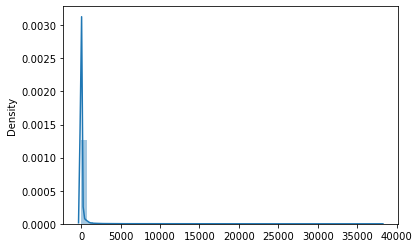

In [48]:
sns.distplot(dfnum) # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

**2) Distplot of the dataset (After normalization)**

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

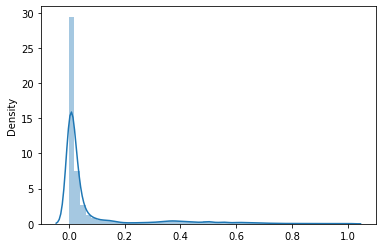

In [49]:
sns.distplot(dfscaled)

#### 3) Distplot for 1st 10 columns

In [50]:
dfnum.columns[0:10]

Index(['4', '10', '59', '67', '74', '79', '82', '91', '92', '95'], dtype='object')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

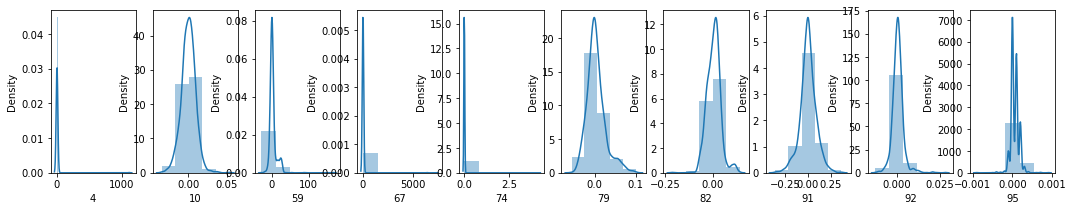

In [51]:
fig,ax=plt.subplots(1,10,figsize=(18,3))
sns.distplot(dfnum['4'],ax=ax[0]);
sns.distplot(dfnum['10'],bins=5,ax=ax[1]);
sns.distplot(dfnum['59'],bins=5,ax=ax[2]);
sns.distplot(dfnum['67'],bins=5,ax=ax[3]);
sns.distplot(dfnum['74'],bins=5,ax=ax[4]);
sns.distplot(dfnum['79'],bins=5,ax=ax[5]);
sns.distplot(dfnum['82'],bins=5,ax=ax[6]);
sns.distplot(dfnum['91'],bins=5,ax=ax[7]);
sns.distplot(dfnum['92'],bins=5,ax=ax[8]);
sns.distplot(dfnum['95'],bins=5,ax=ax[9]);

#### 4) Distplot for 2nd 10 columns

In [52]:
dfnum.columns[10:20]

Index(['96', '99', '102', '106', '114', '140', '147', '148', '151', '152'], dtype='object')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

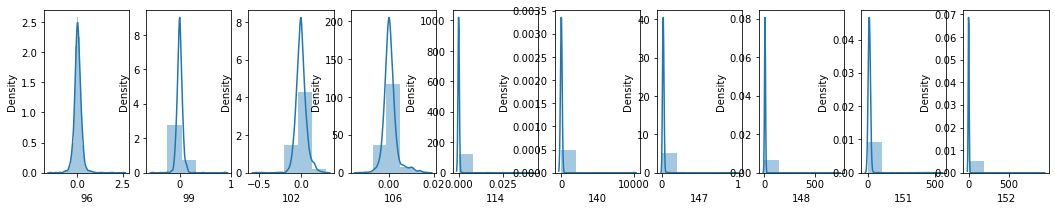

In [53]:
fig,ax=plt.subplots(1,10,figsize=(18,3))
sns.distplot(dfnum['96'],ax=ax[0]);
sns.distplot(dfnum['99'],bins=5,ax=ax[1]);
sns.distplot(dfnum['102'],bins=5,ax=ax[2]);
sns.distplot(dfnum['106'],bins=5,ax=ax[3]);
sns.distplot(dfnum['114'],bins=5,ax=ax[4]);
sns.distplot(dfnum['140'],bins=5,ax=ax[5]);
sns.distplot(dfnum['147'],bins=5,ax=ax[6]);
sns.distplot(dfnum['148'],bins=5,ax=ax[7]);
sns.distplot(dfnum['151'],bins=5,ax=ax[8]);
sns.distplot(dfnum['152'],bins=5,ax=ax[9]);

#### 5) Distplot for 3rd 10 columns


In [54]:
dfnum.columns[20:30]

Index(['155', '156', '159', '160', '161', '162', '164', '165', '195', '196'], dtype='object')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

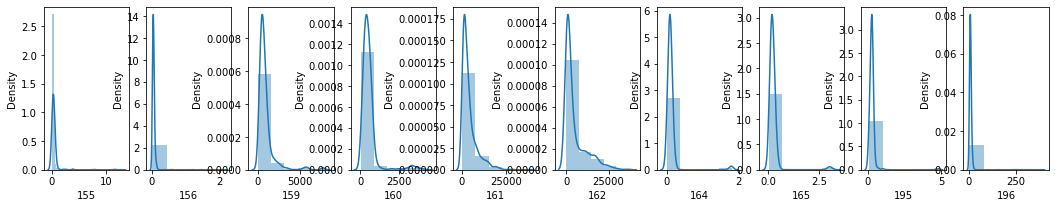

In [55]:
fig,ax=plt.subplots(1,10,figsize=(18,3))
sns.distplot(dfnum['155'],ax=ax[0]);
sns.distplot(dfnum['156'],bins=5,ax=ax[1]);
sns.distplot(dfnum['159'],bins=5,ax=ax[2]);
sns.distplot(dfnum['160'],bins=5,ax=ax[3]);
sns.distplot(dfnum['161'],bins=5,ax=ax[4]);
sns.distplot(dfnum['162'],bins=5,ax=ax[5]);
sns.distplot(dfnum['164'],bins=5,ax=ax[6]);
sns.distplot(dfnum['165'],bins=5,ax=ax[7]);
sns.distplot(dfnum['195'],bins=5,ax=ax[8]);
sns.distplot(dfnum['196'],bins=5,ax=ax[9]);

#### 6) Distplot for 4th 10 columns


In [56]:
dfnum.columns[30:40]

Index(['199', '202', '204', '205', '206', '209', '222', '224', '248', '249'], dtype='object')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

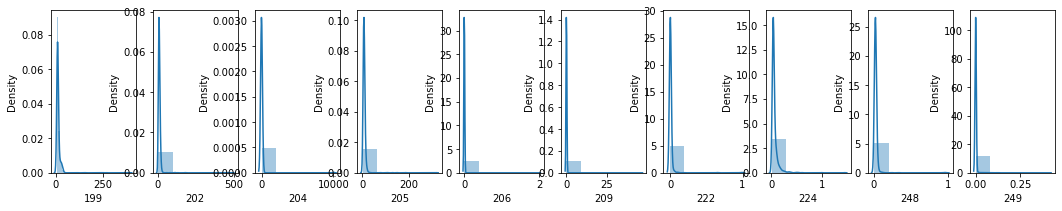

In [57]:
fig,ax=plt.subplots(1,10,figsize=(18,3))
sns.distplot(dfnum['199'],ax=ax[0]);
sns.distplot(dfnum['202'],bins=5,ax=ax[1]);
sns.distplot(dfnum['204'],bins=5,ax=ax[2]);
sns.distplot(dfnum['205'],bins=5,ax=ax[3]);
sns.distplot(dfnum['206'],bins=5,ax=ax[4]);
sns.distplot(dfnum['209'],bins=5,ax=ax[5]);
sns.distplot(dfnum['222'],bins=5,ax=ax[6]);
sns.distplot(dfnum['224'],bins=5,ax=ax[7]);
sns.distplot(dfnum['248'],bins=5,ax=ax[8]);
sns.distplot(dfnum['249'],bins=5,ax=ax[9]);

#### From the above plots, we can understand that they are in Normal / Gaussian distribution but with slight skewness

### b) Barplot of categorical attributes in the dataset

**Barplot for Pass/Fail to Frequency**

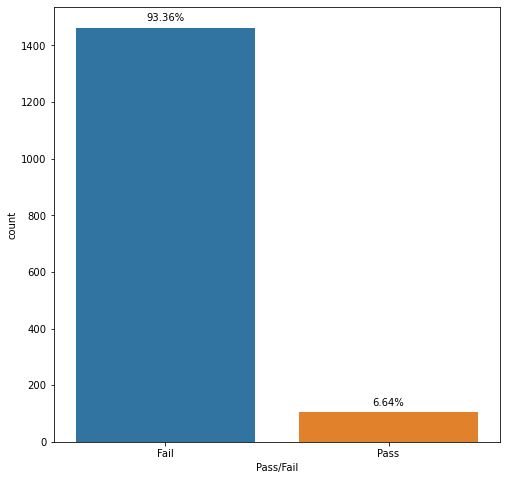

In [58]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(dfcat['Pass/Fail'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = dfcat, x= 'Pass/Fail') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(dfcat)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

- The Pass/Fail class is highly imbalanced, because 93.36% of the data is lying on 'Fail', hence making it the majority class. Due to this data imbalance, the data will be more favorable towards 'Fail' class than 'Pass'.

**Barplot for Month to Frequency**

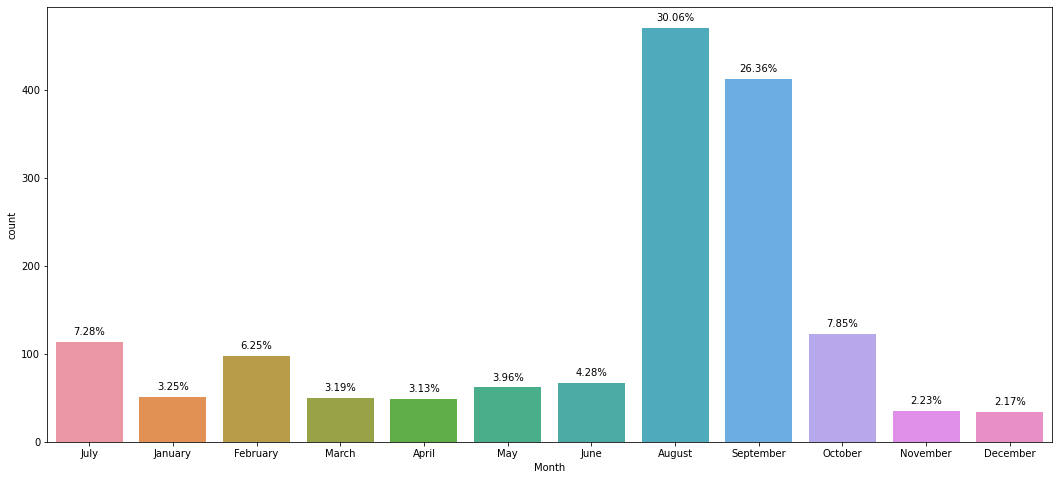

In [59]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(dfcat['Month'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = dfcat, x= 'Month') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(dfcat)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

- The August and September month data is about 56.42% of entire dataset, this means that there were more number of observations during those 2 months than the rest.

### c) CUMULATIVE DISTRIBUTION

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

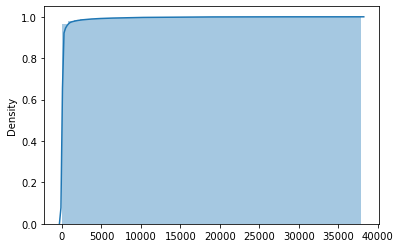

In [60]:
#Cumulative Distribution Plot
sns.distplot(dfnum, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

* The cumulative distribution function (CDF) calculates the cumulative probability for a given x-value. Use the CDF to determine the probability that a random observation that is taken from the population will be less than or equal to a certain value.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.2 Bivariate Analysis
   

### a) Bivariate barplot between Categorical and continuous attributes

In [61]:
dfcombined.shape

(1567, 108)

**Here, we're taking only 2 samples as there are 111 columns where 107 are numerical.**

In [62]:
dfcombined.columns

Index(['4', '10', '59', '67', '74', '79', '82', '91', '92', '95',
       ...
       '557', '572', '574', '576', '583', '585', 'Pass/Fail', 'Time', 'Date',
       'Month'],
      dtype='object', length=108)

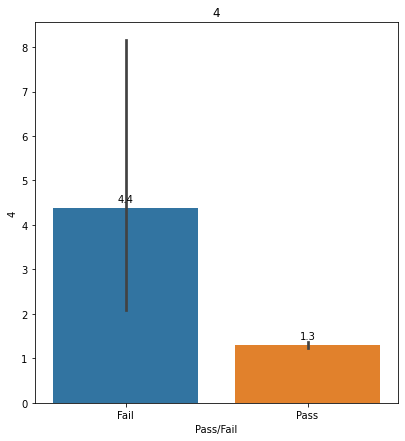

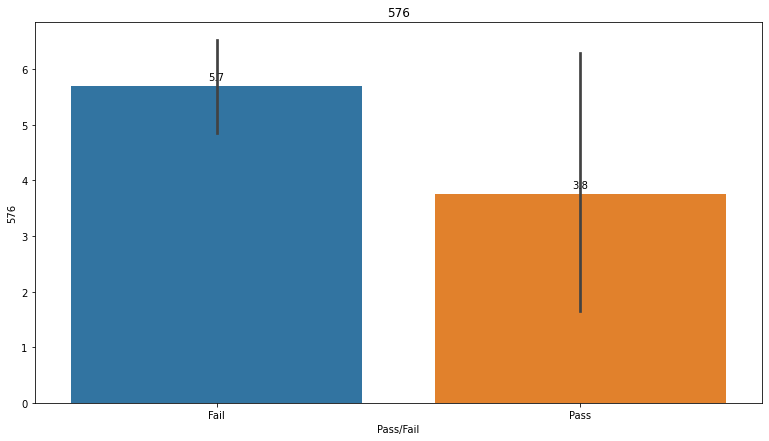

In [63]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(30,7))
plt.subplot(1, 4, 1)
plt.title('4')
splot = sns.barplot(x=dfcombined['Pass/Fail'], y=dfcombined['4'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

#BiVariate Analysis with Barplot

plt.figure(figsize=(60,7))
plt.subplot(1, 4, 2)
plt.title('576')
splot = sns.barplot(x=dfcombined['Pass/Fail'], y=dfcombined['576'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

- From the above plot for Pass/Fail:

>a) '4' = Fail is higher in count than Pass 

>b) '576' = Fail is higher in count than Pass 

- We already know that the class is imbalanced and needs to get balanced before model building

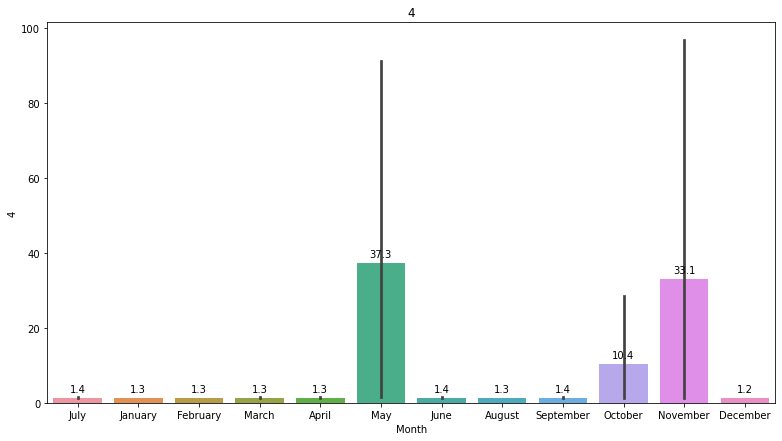

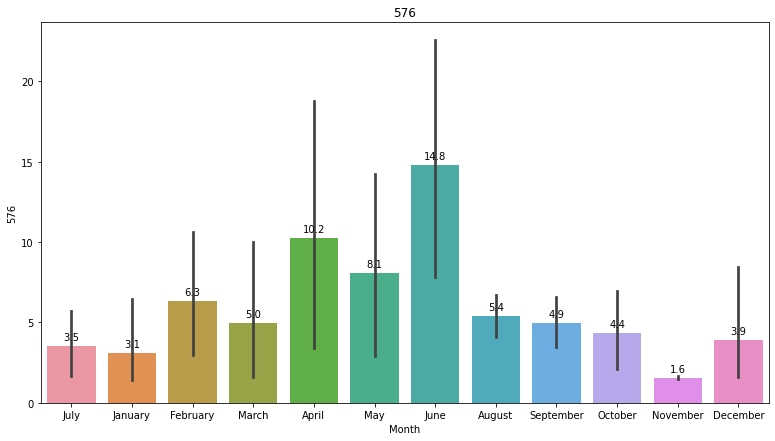

In [64]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(60,7))
plt.subplot(1, 4, 1)
plt.title('4')
splot = sns.barplot(x=dfcombined['Month'], y=dfcombined['4'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

#BiVariate Analysis with Barplot

plt.figure(figsize=(60,7))
plt.subplot(1, 4, 2)
plt.title('576')
splot = sns.barplot(x=dfcombined['Month'], y=dfcombined['576'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

- From the above plot for Month the top 3 are:

>a) '4' = May > November > October 

>b) '576' = June > April > May > February

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.2.3 Multivariate Analysis
   

### a) Multivariate 2 categorical (1 categorical and 1 target attribute) and 1 numerical barplot

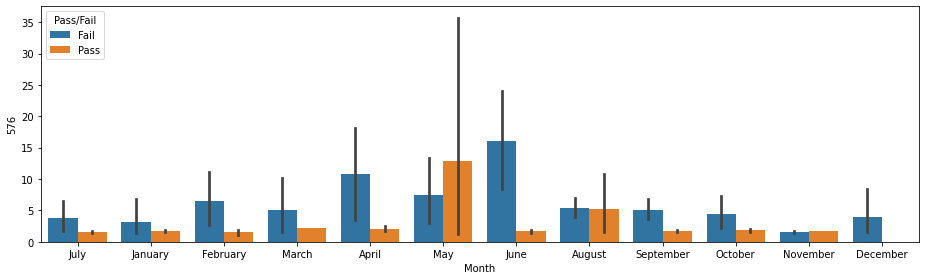

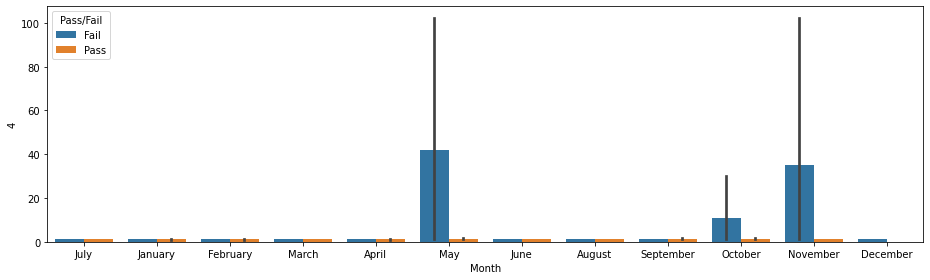

In [65]:
plt.figure(figsize=(50,4))
plt.subplot(1, 4, 1)
sns.barplot(y='576',x='Month',hue='Pass/Fail',data=dfcombined);
plt.ylabel('576')
plt.tight_layout()

plt.figure(figsize=(50,4))
plt.subplot(1, 4, 1)
sns.barplot(y='4',x='Month',hue='Pass/Fail',data=dfcombined);
plt.ylabel('4')
plt.tight_layout()

- From the above plot, it is observed that top 3 occuring are:

> a) '576' = June (fail) > May (pass) > April (fail)

> b) '4' = May (fail) > November (fail) > October (fail)

### b) Correlation Heatmap

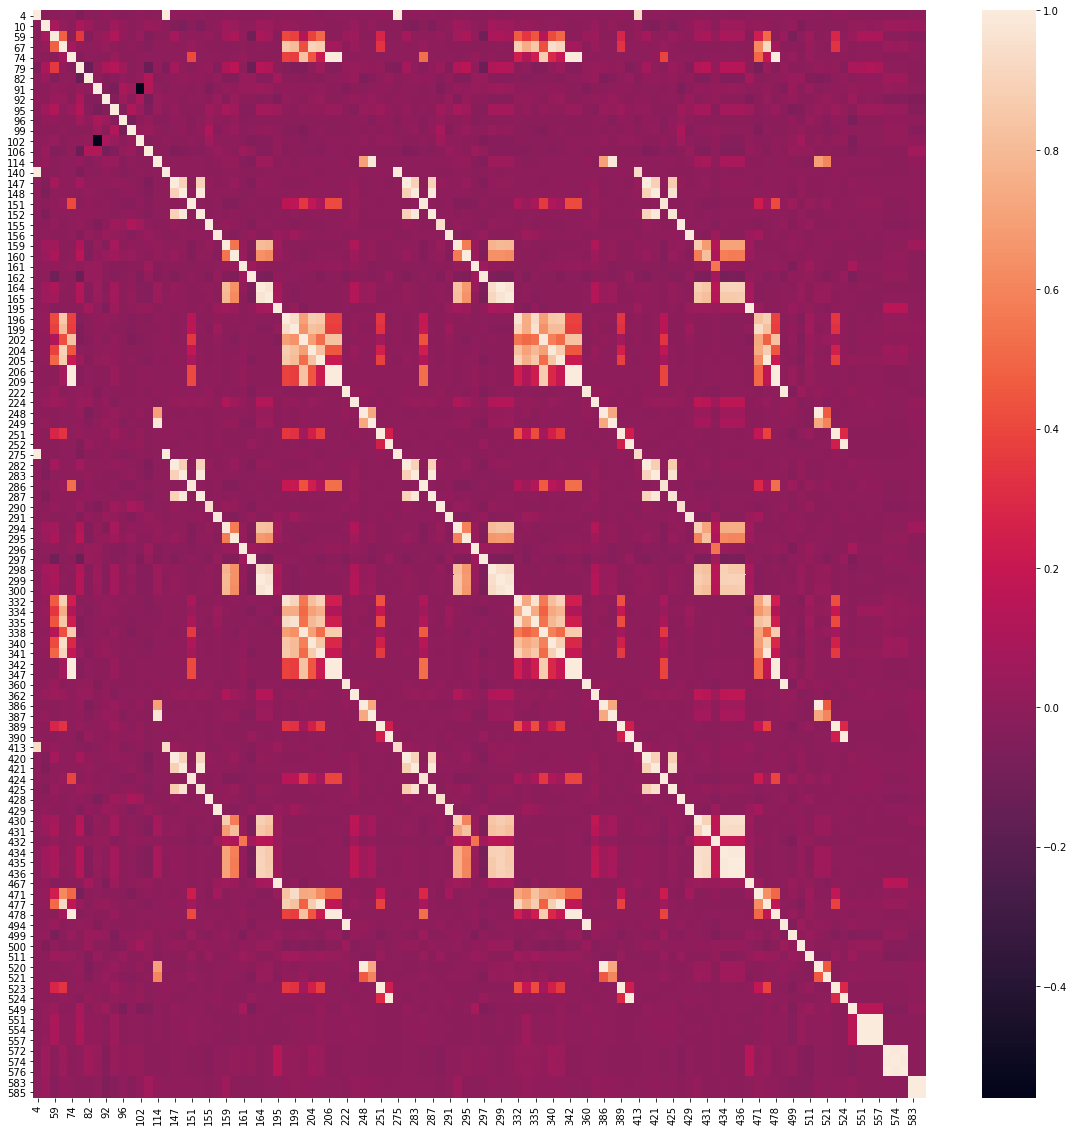

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(dfnum.corr(),annot=False);

- From the above heat map, we can see that some of the attributes have high correlation from the color, this indicates that there is multicolinearity in the data. This can be reduced by performing dimensionality reduction. Here, we can perform PCA for dimensionality reduction.

### c) Pairplot

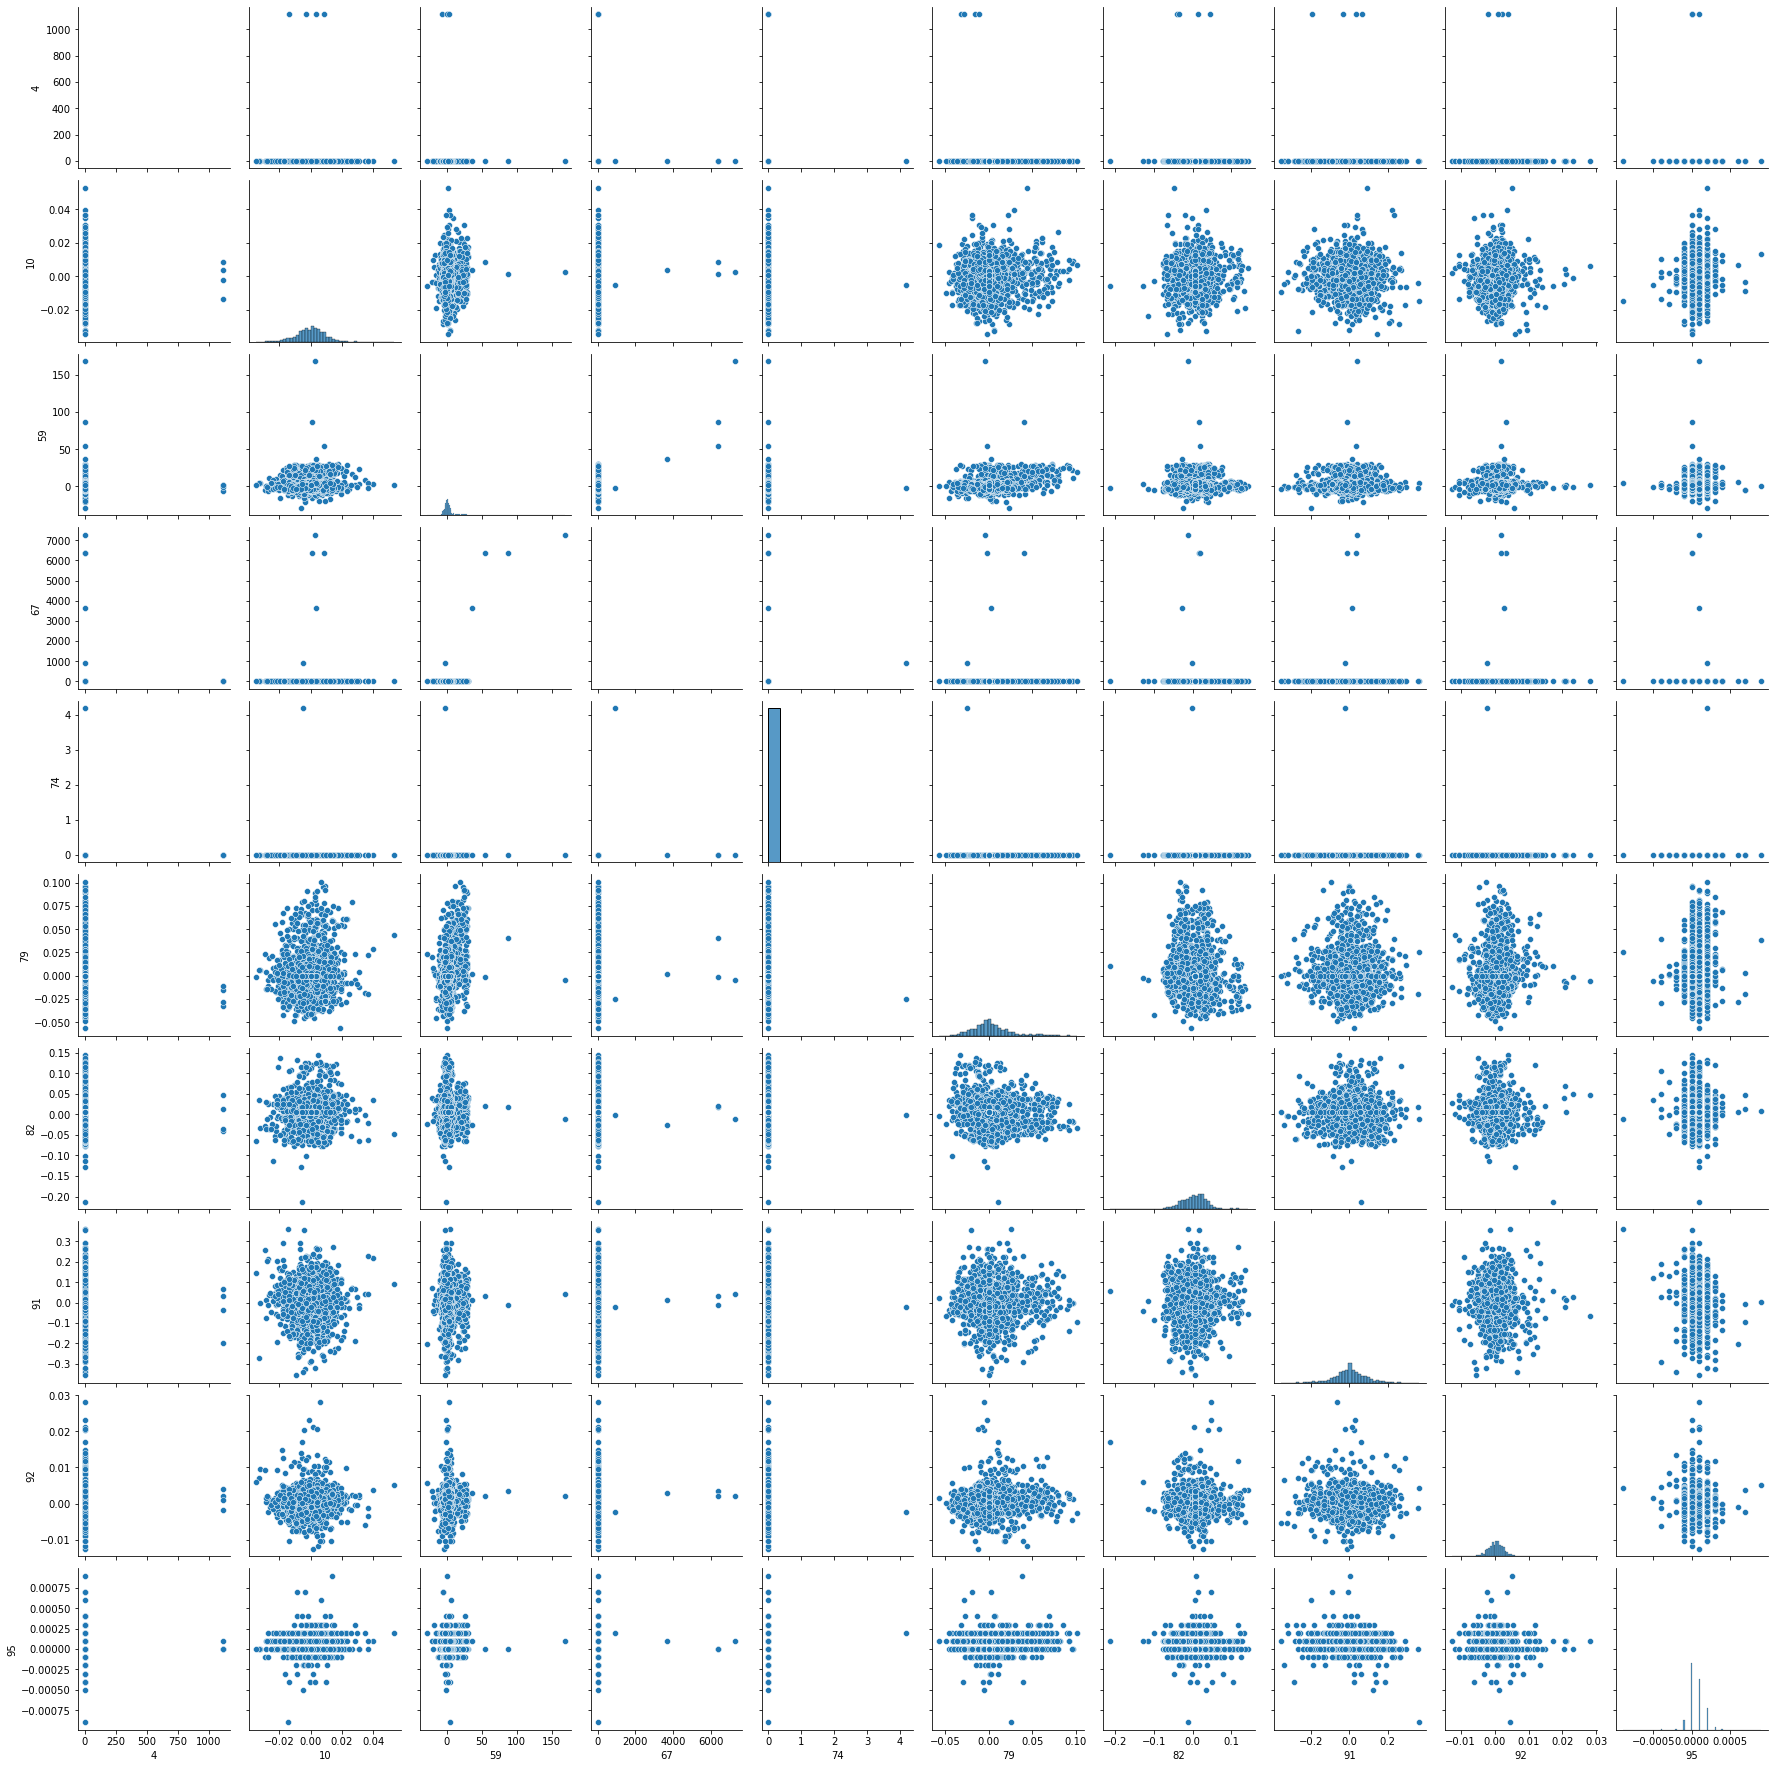

In [67]:
sns.pairplot(dfnum.iloc[:,0:10]);

<font size="5"><p style="color:black"> <b> 4. Data pre-processing: </p></font>

### Checking for Data imbalance
   

In [103]:
dfcombined['Pass/Fail'].value_counts()

Fail    1463
Pass     104
Name: Pass/Fail, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

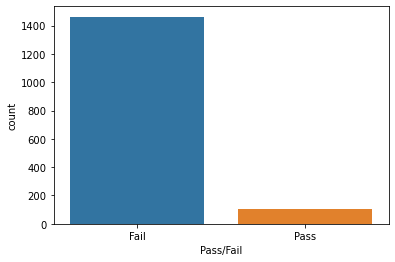

In [104]:
sns.countplot(dfcombined['Pass/Fail'])

- Class 0 (Fail) has significantly more information than class 1 (Pass). The class is imbalanced. This class imbalance should be treated via Oversampling or Undersampling.

### Outlier Treatment
   

In [105]:
dfmodel = dfcombined.drop(['Time','Date','Month'],axis = 1)

In [106]:
from scipy.stats import zscore
for feature in dfmodel.columns[:-1]:
    dfmodel['zscore']=zscore(dfmodel[feature])
    dfmodel[feature].replace((dfmodel[dfmodel['zscore'].abs()>=2].index),dfmodel[feature].median(),inplace=True)
    dfmodel.drop(['zscore'],axis=1,inplace=True)

In [107]:
dfmodel.isnull().sum().sum()

0

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.1 Segregate predictors vs target attributes

In [108]:
X=dfmodel.iloc[:,:-1]
y=dfmodel.iloc[:,-1]

In [109]:
X.shape

(1567, 104)

In [110]:
y.shape

(1567,)

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.2 Check for target balancing and fix it if found imbalanced

In [111]:
y.value_counts()

Fail    1463
Pass     104
Name: Pass/Fail, dtype: int64

### Oversampling with SMOTE

In [112]:
from imblearn.over_sampling import SMOTE

smote= SMOTE()
X, y = smote.fit_resample(X, y)

In [113]:
y.value_counts()

Pass    1463
Fail    1463
Name: Pass/Fail, dtype: int64

- Oversampling is performed with SMOTE to add synthetic data to ensure that the class is balanced and is preferred over undersampling as there is no loss of data.

#### Replacing Pass and Fail with 1 and 0

In [114]:
y.replace(to_replace='Pass', value=1, inplace=True)
y.replace(to_replace='Fail', value=0, inplace=True)

In [115]:
y

0       0
1       0
2       1
3       0
4       0
       ..
2921    1
2922    1
2923    1
2924    1
2925    1
Name: Pass/Fail, Length: 2926, dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.3 Perform train-test split and standardise the data or vice versa if required

In [116]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=12)

In [117]:
x_train.shape

(2340, 104)

In [118]:
x_test.shape

(586, 104)

In [119]:
y_train.shape

(2340,)

In [120]:
y_test.shape

(586,)

In [121]:
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()

x_train = sc1.fit_transform(x_train)
x_test = sc1.transform(x_test)

- The features have been scaled with StandardScaler where the data is fit on train and test features. The fit() function will scale using standard deviation and mean.

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.4 Check if the train and test data have similar statistical characteristics when compared with original data.

### Original Data

In [122]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


In [123]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.145071,0.004775,-0.007655,-0.011047,NaN,0.002281,0.031510,-0.052731,0.009052,...,-0.028380,0.000225,0.023469,0.019921,0.023605,0.018472,-0.025909,-0.028196,0.004177,-0.025144
1,-0.145071,1.000000,0.005802,-0.007603,-0.001641,NaN,-0.025702,-0.012084,0.031321,0.024015,...,0.083463,0.043690,0.002905,-0.001264,0.002273,-0.009417,0.017290,0.010134,0.044834,-0.002615
2,0.004775,0.005802,1.000000,0.298935,0.095891,NaN,-0.136225,-0.273970,0.023609,0.016291,...,-0.010759,-0.006061,0.015711,0.018237,0.015765,-0.025548,-0.029479,-0.030943,-0.033226,-0.000957
3,-0.007655,-0.007603,0.298935,1.000000,-0.058483,NaN,-0.685835,0.138290,-0.103656,0.068998,...,-0.096619,0.009045,0.025461,0.024754,0.026043,0.034779,-0.039309,-0.033780,-0.081157,-0.024631
4,-0.011047,-0.001641,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.916410,-0.026035,0.054619,...,0.088327,0.045361,-0.001301,-0.001598,-0.001617,-0.044016,-0.031145,-0.026204,0.051428,-0.013760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.018472,-0.009417,-0.025548,0.034779,-0.044016,NaN,-0.041296,0.058171,0.010436,0.033759,...,-0.475397,-0.016726,0.002257,0.001606,0.002744,1.000000,0.167913,0.164238,-0.486559,0.004157
587,-0.025909,0.017290,-0.029479,-0.039309,-0.031145,NaN,0.034184,-0.021472,0.022853,0.059341,...,0.396369,-0.024481,-0.002650,-0.002498,-0.002931,0.167913,1.000000,0.974276,0.390813,0.035392
588,-0.028196,0.010134,-0.030943,-0.033780,-0.026204,NaN,0.032359,-0.020962,0.026261,0.060803,...,0.379167,-0.020712,-0.002261,-0.001957,-0.002531,0.164238,0.974276,1.000000,0.389211,0.031168
589,0.004177,0.044834,-0.033226,-0.081157,0.051428,NaN,0.044227,-0.107875,-0.022776,0.004882,...,1.000000,0.041494,-0.003008,-0.003295,-0.003801,-0.486559,0.390813,0.389211,1.000000,-0.002654


### x_test

In [124]:
x_test.mean()

0.03953208115918588

In [125]:
x_test.min()

-5.0142066101698894

In [126]:
x_test.max()

112.4196825274072

In [127]:
x_test.std()

1.6914033628895946

### x_train

In [128]:
x_train.mean()

8.175212278633632e-19

In [129]:
x_train.min()

-9.65529925969544

In [130]:
x_train.max()

48.363209157374996

In [131]:
x_train.std()

0.9999999999999999

- The correlation for Train and Test to Original Data greatly varies as there were many preprocessing performed to ensure that the data would be suitable for model building

- The Original data to Train and Test are completely different in statistical characteristics which can be understood from the five summary analysis, as pre processing, scaling and other data processing techniques were implemented to change the data. 

<font size="5"><p style="color:black"> <b> 5. Model training, testing and tuning: </p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">5.1 Model training:

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.1 Pick up a supervised learning model.

## I) Decision Tree Classifier

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
dTreeR = DecisionTreeClassifier(random_state=12)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.2 Train the model.

In [133]:
dTreeR.fit(x_train, y_train)


prediction_tree_train = dTreeR.predict(x_train)
prediction_tree_test = dTreeR.predict(x_test)

dTreetrain = metrics.accuracy_score(y_train, prediction_tree_train)
dTreetest = metrics.accuracy_score(y_test, prediction_tree_test)

dTree_precision_train = precision_score(y_train, prediction_tree_train)
dTree_recall_train = recall_score(y_train, prediction_tree_train)

dTree_precision_test = precision_score(y_test, prediction_tree_test)
dTree_recall_test = recall_score(y_test, prediction_tree_test)

dTree_F1 = 2 * (dTree_precision_test * dTree_recall_test) / (dTree_precision_test + dTree_recall_test)

In [134]:
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy_Train': [dTreetrain],'accuracy_Test': [dTreetest],'Precision_Train': [dTree_precision_train],'Precision_Test':[dTree_precision_test],'Recall_Train':[dTree_recall_train],'Recall_Test':[dTree_recall_test], 'F1-Score':[dTree_F1]})
resultsDf

,Method,accuracy_Train,accuracy_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,F1-Score
0,Decision Tree,1.0,0.890785,1.0,0.880399,1.0,0.904437,0.892256


- From the above train and test scores, we can tell that the model is Overfit, the accuracy score can be improved by hyperparameter tuning

- Accuracy Train - 100% and Test - 89.07%

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.3 Use cross validation techniques. Hint: Use all CV techniques that you have learnt in the course.

### a) K Fold Cross Validation

In [135]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10)
results = cross_val_score(dTreeR,x_train,y_train, cv=kfold)
print(results,'\n')

print('The mean is:',results.mean(),'\n\n','The standard deviation is:',results.std())

[0.85042735 0.90598291 0.90598291 0.88461538 0.91452991 0.8974359
 0.89316239 0.87606838 0.87179487 0.87606838] 

The mean is: 0.8876068376068377 

 The standard deviation is: 0.018534400377949952


- The test accuracy after K Fold cross validation is 0.88 and the Standard Deviation is 0.014 which is pretty low. Thus, we can say that this model will perform well between 85.2% (0.88 - 2 * 0.014) and 90.8% (0.88 +2 * 0.014) in 95% confidence interval.

### b) Leave One Out Cross Validation (LOOCV)

In [136]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

scores = cross_val_score(dTreeR,x_train,y_train, cv=LeaveOneOut())
print(scores,'\n')

print('The mean is:',scores.mean(),'\n\n','The standard deviation is:',scores.std())

[1. 1. 1. ... 1. 1. 1.] 

The mean is: 0.9102564102564102 

 The standard deviation is: 0.2858140616616404


- The test accuracy after LOOCV cross validation is 0.91 and the Standard Deviation is 0.28 which is very high. Thus, we can say that this model performance will vary a lot

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.4 Apply hyper-parameter tuning techniques to get the best accuracy. Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

### Hyperparameter Tuning with RandomizedSearchCV

In [138]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10], 'max_features' : [5,10,15,20,25,30,35,40,45,50,55,60,65,70]}
grid = RandomizedSearchCV(dTreeR, param_distributions,cv=10)  
%time grid.fit(x_train, y_train)
print(grid.best_params_)

Wall time: 4.13 s
{'min_samples_leaf': 2, 'max_features': 65, 'max_depth': 30}


### Tuning the Decision Tree with the best params

In [139]:
TunedTreeR = DecisionTreeClassifier(max_depth = 16, min_samples_leaf = 11, max_features = 61, random_state=12)
TunedTreeR.fit(x_train, y_train)
prediction_Tunedtree_train = TunedTreeR.predict(x_train)
prediction_Tunedtree_test = TunedTreeR.predict(x_test)

TunedTreetrain = metrics.accuracy_score(y_train, prediction_Tunedtree_train)
TunedTreetest = metrics.accuracy_score(y_test, prediction_Tunedtree_test)

Tunedtree_precision_train = precision_score(y_train, prediction_Tunedtree_train)
Tunedtree_recall_train = recall_score(y_train, prediction_Tunedtree_train)

Tunedtree_precision_test = precision_score(y_test, prediction_Tunedtree_test)
Tunedtree_recall_test = recall_score(y_test, prediction_Tunedtree_test)

Tuned_dTree_F1 = 2 * (Tunedtree_precision_test * Tunedtree_recall_test) / (Tunedtree_precision_test + Tunedtree_recall_test)

In [140]:
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy_Train': [TunedTreetrain],'accuracy_Test': [TunedTreetest],'Precision_Train': [Tunedtree_precision_train],'Precision_Test':[Tunedtree_precision_test],'Recall_Train':[Tunedtree_recall_train],'Recall_Test':[Tunedtree_recall_test],'F1-Score':[Tuned_dTree_F1]})
resultsDf

,Method,accuracy_Train,accuracy_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,F1-Score
0,Decision Tree,0.940598,0.870307,0.947871,0.872852,0.932479,0.866894,0.869863


- After GridSearchCV, manual tinkering of max_depth from 30 to 16, min_samples_leaf from 2 to 11 and max_features from 65 to 61. 

- After Hyperparamter tuning, the model is not overfit and the test score is slightly higher. However, there are so many attributes and it would have to get reduced before it can be used in production. Hence, we need to perform Dimensionality reduction with PCA

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.5 Use any other technique/method which can enhance the model performance. Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.

In [141]:
from sklearn.decomposition import PCA
pca = PCA()    
pca.fit(x_train)
print("The Variance Ratio \n", pca.explained_variance_ratio_)
print("\n The cumulative Variance Ratio \n", np.cumsum(pca.explained_variance_ratio_))
print("\n The PCA components \n",pca.components_)

The Variance Ratio 
 [1.36226221e-01 1.23649530e-01 8.07283659e-02 5.43480999e-02
 5.22201691e-02 4.50802122e-02 3.71300893e-02 3.39957147e-02
 3.04026614e-02 2.92175923e-02 2.86672506e-02 2.78832803e-02
 2.44346672e-02 2.20059689e-02 2.05005963e-02 1.95589199e-02
 1.84368869e-02 1.64965827e-02 1.50258479e-02 1.44882277e-02
 1.33667070e-02 1.18391144e-02 1.11958609e-02 1.02474111e-02
 9.67790529e-03 9.41864095e-03 8.95321039e-03 8.68611655e-03
 8.34526708e-03 7.86557707e-03 7.26651557e-03 7.08349995e-03
 6.19990183e-03 5.77282599e-03 5.02908816e-03 4.53449239e-03
 4.41995371e-03 4.10211982e-03 4.02158683e-03 3.51536773e-03
 3.24879321e-03 2.40735082e-03 2.09560568e-03 1.86988911e-03
 1.79112001e-03 1.22957419e-03 1.04624923e-03 8.26715405e-04
 5.79332598e-04 4.72612895e-04 3.98946581e-04 3.08012168e-04
 2.42636289e-04 2.36947192e-04 2.14935149e-04 1.55900981e-04
 1.10634105e-04 9.93299616e-05 6.49531956e-05 6.39333855e-05
 5.28689230e-05 5.03348079e-05 4.35839307e-05 4.00243226e-05
 3.

In [142]:
x_train.shape

(2340, 104)

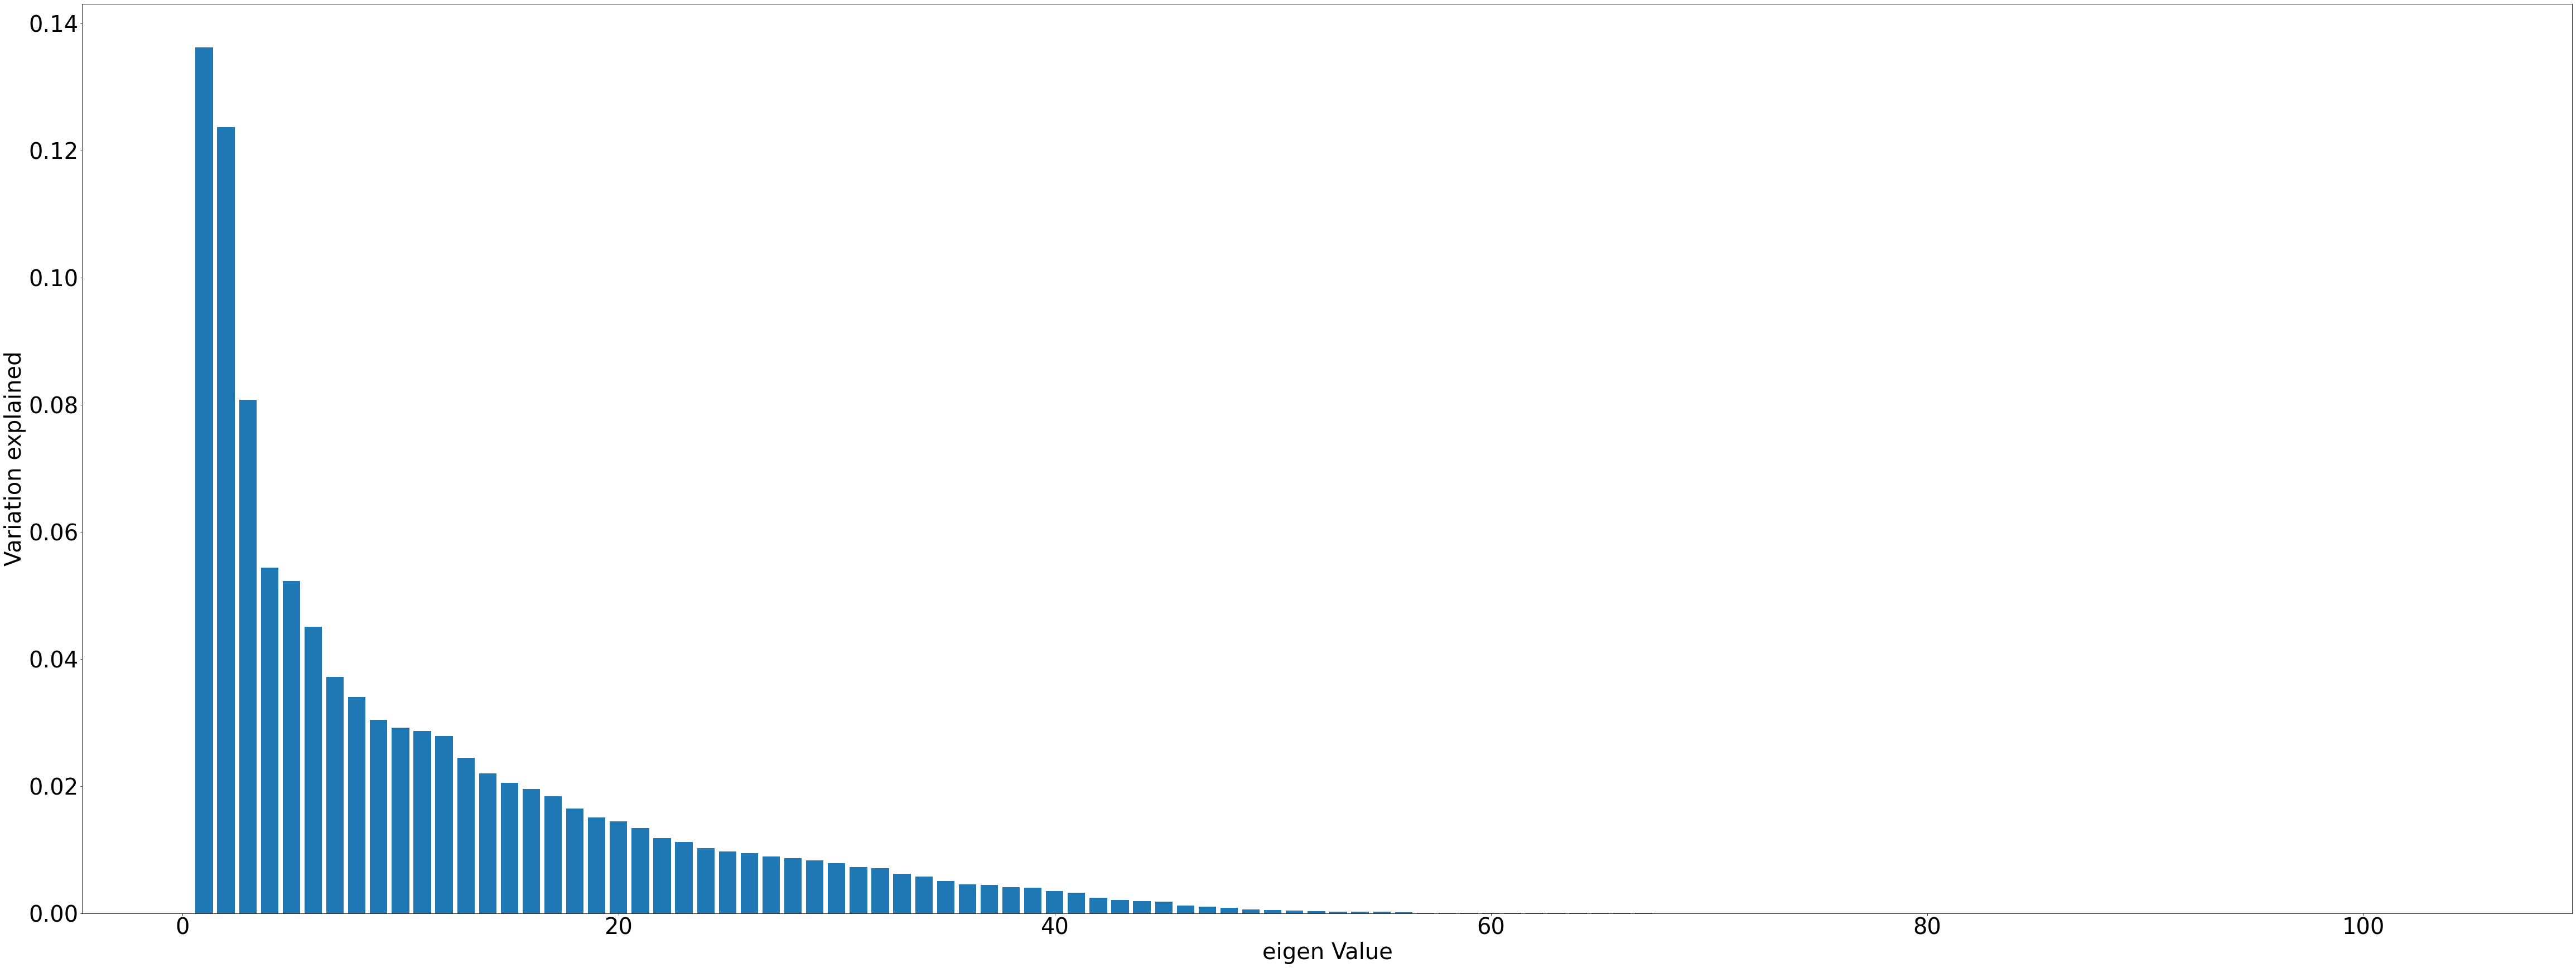

In [143]:
plt.figure(figsize = (80, 30))
plt.rc('font', size=40)
plt.bar(list(range(1,105)),pca.explained_variance_ratio_,alpha=1, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

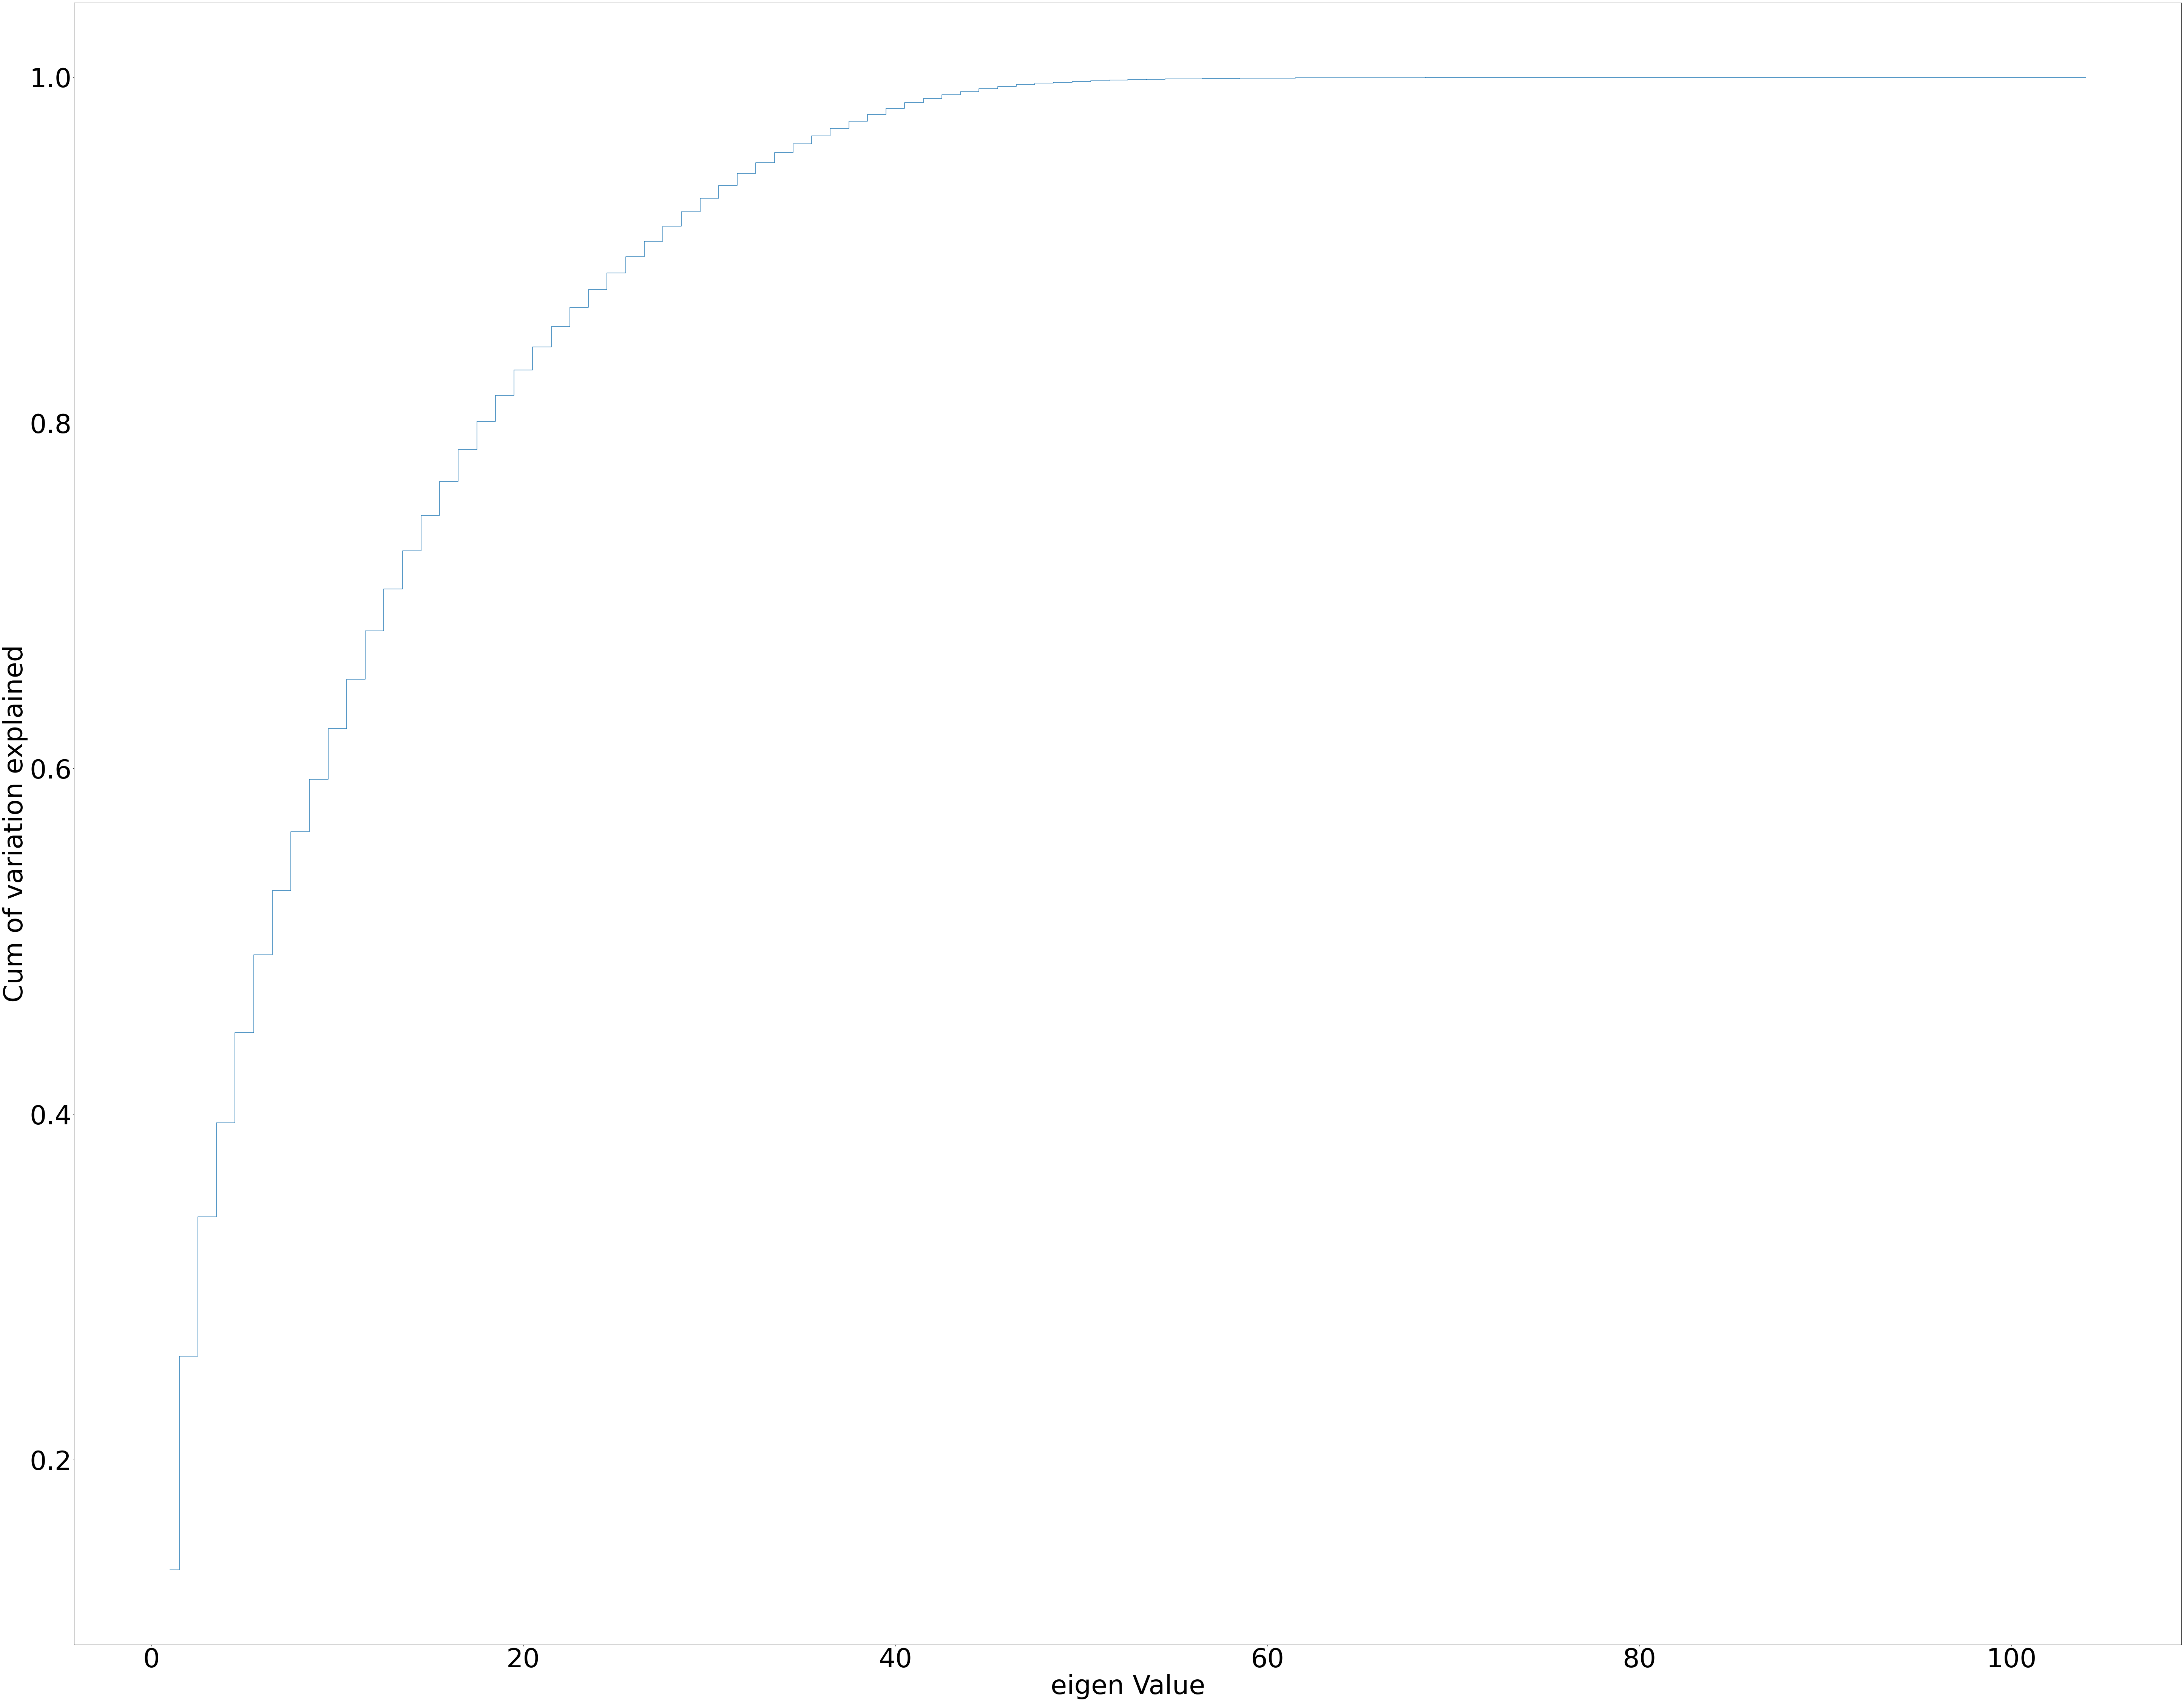

In [144]:
plt.figure(figsize = (100, 80))
plt.rc('font', size=70)
plt.step(list(range(1,105)),np.cumsum(pca.explained_variance_ratio_),alpha =1, where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

- From the plot, we can understand that at 40 components it covers over 94% data, hence it is acceptable to select that

In [145]:
pca=PCA(n_components=40)
pca.fit(x_train)

PCA(n_components=40)

In [146]:
x_trainz=pca.transform(x_train)
x_testz=pca.transform(x_test)

In [147]:
param_distributions = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10], 'max_features' : [5,10,15,20,25,30,35,40]}

grid = RandomizedSearchCV(dTreeR, param_distributions,cv=10)
%time grid.fit(x_trainz, y_train)
print(grid.best_params_)

Wall time: 3.8 s
{'min_samples_leaf': 5, 'max_features': 15, 'max_depth': 12}


In [148]:
x_trainz.shape

(2340, 40)

In [149]:
x_testz.shape

(586, 40)

In [150]:
y_train.shape

(2340,)

In [151]:
y_test.shape

(586,)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.6 Display and explain the classification report in detail.

### Classification Report

In [206]:
PCATreeR = DecisionTreeClassifier(max_depth = 17, min_samples_leaf = 5, max_features =21, random_state=12)
PCATreeR.fit(x_trainz, y_train)
prediction_PCATreeR_train = PCATreeR.predict(x_trainz)
prediction_PCATreeR_test = PCATreeR.predict(x_testz)

PCATreeRtrain = metrics.accuracy_score(y_train, prediction_PCATreeR_train)
PCATreeRtest = metrics.accuracy_score(y_test, prediction_PCATreeR_test)

PCATreeR_precision_train = precision_score(y_train, prediction_PCATreeR_train)
PCATreeR_recall_train = recall_score(y_train, prediction_PCATreeR_train)

PCATreeR_precision_test = precision_score(y_test, prediction_PCATreeR_test)
PCATreeR_recall_test = recall_score(y_test, prediction_PCATreeR_test)

PCATreeR_F1 = 2 * (PCATreeR_precision_test * PCATreeR_recall_test) / (PCATreeR_precision_test + PCATreeR_recall_test)

In [207]:
resultsDf1 = pd.DataFrame({'Method':['Decision Tree'], 'accuracy_Train': [PCATreeRtrain],'accuracy_Test': [PCATreeRtest],'Precision_Train': [PCATreeR_precision_train],'Precision_Test':[PCATreeR_precision_test],'Recall_Train':[PCATreeR_recall_train],'Recall_Test':[PCATreeR_recall_test],'F1-Score':[PCATreeR_F1]})
resultsDf1

,Method,accuracy_Train,accuracy_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,F1-Score
0,Decision Tree,0.932479,0.824232,0.909385,0.800633,0.960684,0.863481,0.83087


- The Test accuracy reduced by 5% but now the model is more balanced and the model does seem to overfit or underfit the data. 

- After PCA dimensionality reduction, over 64 columns were removed and only 5% reduction in test accuracy. This means that there were a lot of insignificant columns in the dataset

- Here Recall is the most important metric for this model which we will try to maximize more than Precision, Recall at 86.3% is good. Precision is 80.06% and F1 score being the combination of Recall and Precision is at 83.08%. This is really good for a dataset

### ROC Curve 

In [208]:
def plot_roc_curve1(fpr, tpr):
    plt.figure(figsize = (15, 5))
    plt.rc('font', size=10)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Decision Tree Classifier')
    plt.legend()
    plt.show()

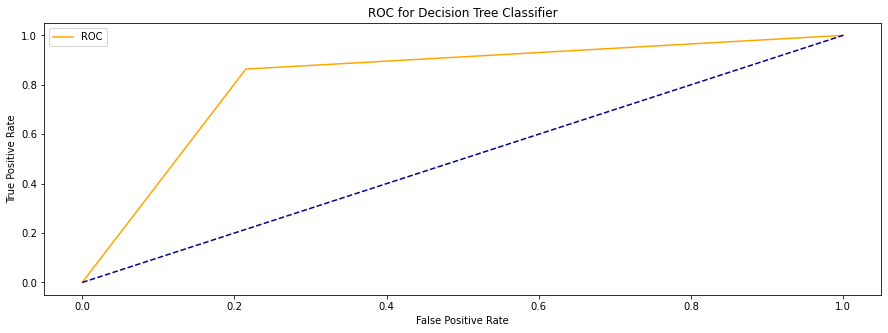

Area under the curve:  0.8242320819112628


In [209]:
# Loading the probability values for positive class
y_prob = PCATreeR.predict_proba(x_trainz)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_PCATreeR_test, pos_label=1)
# Plotting the ROC curve
plot_roc_curve1(fpr, tpr)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

- From the above plot, we can tell that the AUC is 0.8243 which is 82.43% which is pretty good with only 40 columns from the initial 592 columns of the original dataset

### Confusion Matrix

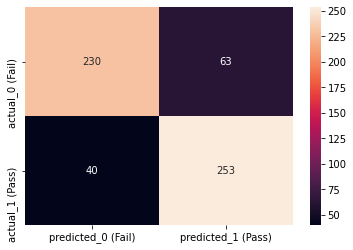

In [210]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, prediction_PCATreeR_test)
df_conf_mat = pd.DataFrame(conf_mat,index=['actual_0 (Fail)', 'actual_1 (Pass)'],columns=['predicted_0 (Fail)', 'predicted_1 (Pass)',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

True Positives (TP): we correctly predicted "Bottom right" True positives (Pass to Predict Pass)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Fail to Predict Fail)

False Positives (FP): we incorrectly predicted "Bottom left" False Positives (a "Type I error") that means the signals had Passed but they were set as Fail. 

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the signals had Failed but they were set as Pass. 

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.7 Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to new train and test accuracies. Hint: You can use your concepts learnt under Applied Statistics module.

### Here, we perform Bootstrap Cross Validation to check whether different folds (sample population) can lead to new train and test accuracies.

### Bootstrap Cross Validation

In [211]:
dfmodel1 = dfmodel.copy()
dfmodel1.replace(to_replace='Pass', value=1, inplace=True)
dfmodel1.replace(to_replace='Fail', value=0, inplace=True)
values = dfmodel1.values

In [212]:
dfmodel1.shape

(1567, 105)

In [213]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
# configure bootstrap
n_iterations = 40              # Number of bootstrap samples to create
n_size = int(len(dfmodel1) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
# prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    
    score1 = accuracy_score(test[:,-1], predictions) 
    score2 =model.score(train[:,:-1], train[:,-1]) # caution, overall accuracy score can mislead when classes are imbalanced

    print(score1)
    stats.append(score1)
    
print('\n The mean for Test set is:',score1.mean())

0.8600212089077413
0.8783068783068783
0.8755230125523012
0.871578947368421
0.8731958762886598
0.8548559231590181
0.8556375131717597
0.8814102564102564
0.894901144640999
0.8707983193277311
0.8927444794952681
0.8983228511530398
0.881675392670157
0.8865546218487395
0.8696109358569927
0.8620689655172413
0.8922594142259415
0.8592283628779979
0.8664529914529915
0.8629707112970711
0.8817991631799164
0.8665966386554622
0.881104033970276
0.8645502645502645
0.8776595744680851
0.8781512605042017
0.881427072402938
0.896588486140725
0.871822033898305
0.8957446808510638
0.8776371308016878
0.8720430107526882
0.8613138686131386
0.8823529411764706
0.866948257655755
0.8832807570977917
0.850418410041841
0.8859832635983264
0.8837696335078534
0.8716075156576201

 The mean for Test set is: 0.8716075156576201


In [214]:
print(score2)
print('\n The mean for Train set is:',score2.mean())

1.0

 The mean for Train set is: 1.0


- The test accuracy after Bootstrap cross validation is 0.871

- The train accuracy after Bootstrap cross validation is 1.0

### Confidence Intervals

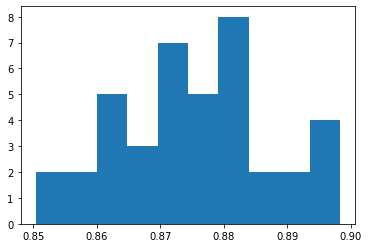

95.0 confidence interval 85.5% and 89.7%


In [215]:
# plot scores
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                            
p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

- There were 40 different folds/models created under which train accuracy was always 100%

- The test accuracy was found to be between 85.5% and 89.7% for 95% confidence interval

- From the original decision tree model, we found that the train and test is: 100% and 89.07%.

- Hence it can be concluded that different sample population will not lead to drastically changed new train and test accuracies as the original decision tree model was 89.07 on test accuracy

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.8 Apply the above steps for all possible models that you have learnt so far.

## II) Logistic Regression Classifier

In [607]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_trainz,y_train)

LogisticRegression()

In [608]:
c_space = range(1,15)
param_distributions = {'C': c_space}

grid1 = RandomizedSearchCV(LR, param_distributions,cv=10)
%time grid1.fit(x_trainz, y_train)
print(grid1.best_params_)

Wall time: 1.88 s
{'C': 12}


In [609]:
LR_tuned=LogisticRegression(C=11,solver='lbfgs', max_iter=100)
LR_tuned.fit(x_trainz,y_train)

LogisticRegression(C=11)

In [610]:
prediction_LR_train = LR_tuned.predict(x_trainz)
prediction_LR_test = LR_tuned.predict(x_testz)

LRtrain = metrics.accuracy_score(y_train, prediction_LR_train)
LRtest = metrics.accuracy_score(y_test, prediction_LR_test)

LR_precision_train = precision_score(y_train, prediction_LR_train)
LR_recall_train = recall_score(y_train, prediction_LR_train)

LR_precision_test = precision_score(y_test, prediction_LR_test)
LR_recall_test = recall_score(y_test, prediction_LR_test)

LR_F1 = 2 * (LR_precision_test * LR_recall_test) / (LR_precision_test + LR_recall_test)

### K Fold Cross Validation

In [612]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10)
results = cross_val_score(LR_tuned,x_trainz,y_train, cv=kfold)
print(results,'\n')

print('The mean is:',results.mean(),'\n\n','The standard deviation is:',results.std())

[0.71794872 0.72222222 0.73504274 0.67521368 0.72222222 0.7008547
 0.64957265 0.7008547  0.71367521 0.73504274] 

The mean is: 0.7072649572649572 

 The standard deviation is: 0.025658825730389873


### ROC Curve

In [ ]:
def plot_roc_curve1(fpr, tpr):
    plt.figure(figsize = (15, 5))
    plt.rc('font', size=10)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Decision Tree Classifier')
    plt.legend()
    plt.show()

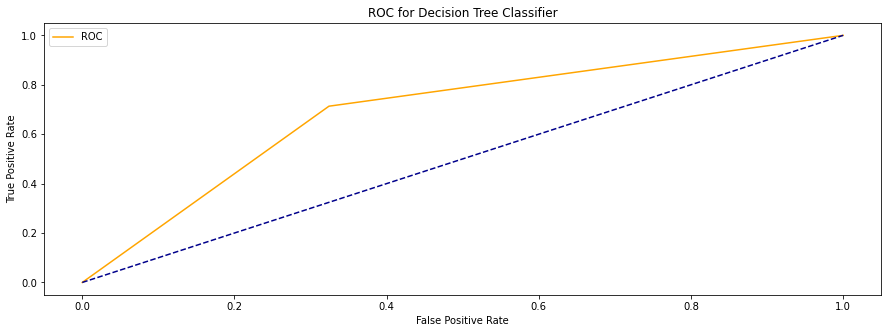

Area under the curve:  0.6945392491467577


In [568]:
# Loading the probability values for positive class
y_prob = LR_tuned.predict_proba(x_trainz)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_LR_test, pos_label=1)
# Plotting the ROC curve
plot_roc_curve1(fpr, tpr)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

- From the above plot, we can tell that the AUC is 0.694 which is 69.4% which is not that great

### Confusion Matrix

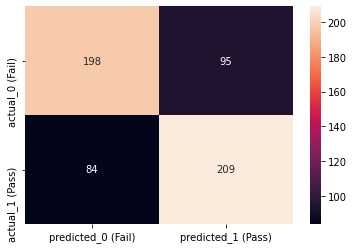

In [569]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, prediction_LR_test)
df_conf_mat = pd.DataFrame(conf_mat,index=['actual_0 (Fail)', 'actual_1 (Pass)'],columns=['predicted_0 (Fail)', 'predicted_1 (Pass)',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

True Positives (TP): we correctly predicted "Bottom right" True positives (Pass to Predict Pass)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Fail to Predict Fail)

False Positives (FP): we incorrectly predicted "Bottom left" False Positives (a "Type I error") that means the signals had Passed but they were set as Fail. 

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the signals had Failed but they were set as Pass. 

## III) K Nearest Neighbours Classifier (KNN)

In [338]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [347]:
param_distributions = {'n_neighbors': [3,5,7,9,11,13,19,21,23,25,27,29],
             'metric':['euclidean','manhattan']}

grid = RandomizedSearchCV(knn, param_distributions,cv=10) 
%time grid.fit(x_trainz, y_train)
print(grid.best_params_)
Kbest = grid.best_estimator_

Wall time: 2.68 s
{'n_neighbors': 3, 'metric': 'manhattan'}


In [348]:
Tuned_knn=KNeighborsClassifier(n_neighbors=3, metric ='manhattan')
Tuned_knn.fit(x_trainz,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [349]:
prediction_Tuned_knn_train = Tuned_knn.predict(x_trainz)
prediction_Tuned_knn_test = Tuned_knn.predict(x_testz)

Tuned_knntrain = metrics.accuracy_score(y_train, prediction_Tuned_knn_train)
Tuned_knntest = metrics.accuracy_score(y_test, prediction_Tuned_knn_test)

Tuned_knn_precision_train = precision_score(y_train, prediction_Tuned_knn_train)
Tuned_knn_recall_train = recall_score(y_train, prediction_Tuned_knn_train)

Tuned_knn_precision_test = precision_score(y_test, prediction_Tuned_knn_test)
Tuned_knn_recall_test = recall_score(y_test, prediction_Tuned_knn_test)

Tuned_knn_F1 = 2 * (Tuned_knn_precision_test * Tuned_knn_recall_test) / (Tuned_knn_precision_test + Tuned_knn_recall_test)

### K Fold Cross Validation

In [613]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10)
results = cross_val_score(Tuned_knn,x_trainz,y_train, cv=kfold)
print(results,'\n')

print('The mean is:',results.mean(),'\n\n','The standard deviation is:',results.std())

[0.83333333 0.85042735 0.84188034 0.84615385 0.80769231 0.84188034
 0.87179487 0.86324786 0.81623932 0.86324786] 

The mean is: 0.8435897435897436 

 The standard deviation is: 0.01941507126769325


### ROC Curve

In [572]:
def plot_roc_curve1(fpr, tpr):
    plt.figure(figsize = (15, 5))
    plt.rc('font', size=10)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Logistic Regression Classifier')
    plt.legend()
    plt.show()

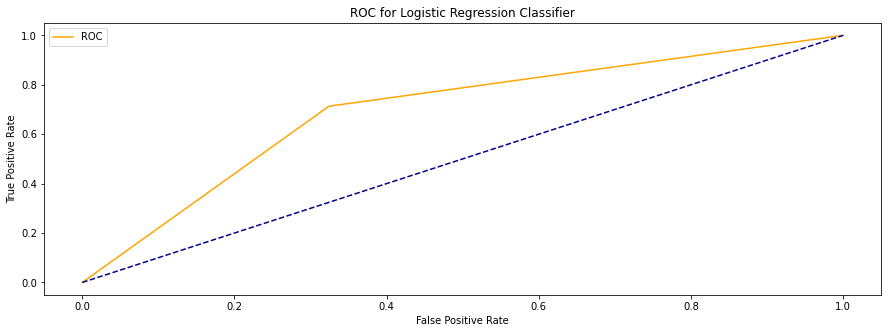

Area under the curve:  0.6945392491467577


In [573]:
# Loading the probability values for positive class
y_prob = LR_tuned.predict_proba(x_trainz)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_LR_test, pos_label=1)
# Plotting the ROC curve
plot_roc_curve1(fpr, tpr)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

- From the above plot, we can tell that the AUC is 0.694 which is 69.4% which is not that great

### Confusion Matrix

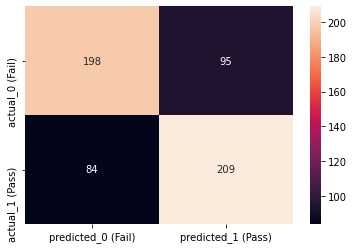

In [574]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, prediction_LR_test)
df_conf_mat = pd.DataFrame(conf_mat,index=['actual_0 (Fail)', 'actual_1 (Pass)'],columns=['predicted_0 (Fail)', 'predicted_1 (Pass)',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

True Positives (TP): we correctly predicted "Bottom right" True positives (Pass to Predict Pass)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Fail to Predict Fail)

False Positives (FP): we incorrectly predicted "Bottom left" False Positives (a "Type I error") that means the signals had Passed but they were set as Fail. 

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the signals had Failed but they were set as Pass. 

## IV) Support Vector Machine Classifier (SVM)

In [575]:
from sklearn.svm import SVC
svm=SVC()

In [576]:
param_distributions={ 'C':[0.1,1,10,100],
            'gamma':[0.01,0.1,1,10],
            'kernel':['rbf','poly'] }
grid=RandomizedSearchCV(svm,param_distributions,cv=10)  
grid.fit(x_trainz,y_train)
grid.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}

In [582]:
svm_tuned=SVC(C = 100 ,gamma = 0.01, kernel = 'rbf',probability=True)
svm_tuned.fit(x_trainz,y_train)

SVC(C=100, gamma=0.01, probability=True)

In [583]:
prediction_svm_tuned_train = svm_tuned.predict(x_trainz)
prediction_svm_tuned_test = svm_tuned.predict(x_testz)

svm_tunedtrain = metrics.accuracy_score(y_train, prediction_svm_tuned_train)
svm_tunedtest = metrics.accuracy_score(y_test, prediction_svm_tuned_test)

svm_tuned_precision_train = precision_score(y_train, prediction_svm_tuned_train)
svm_tuned_recall_train = recall_score(y_train, prediction_svm_tuned_train)

svm_tuned_precision_test = precision_score(y_test, prediction_svm_tuned_test)
svm_tuned_recall_test = recall_score(y_test, prediction_svm_tuned_test)

svm_tuned_F1 = 2 * (svm_tuned_precision_test * svm_tuned_recall_test) / (svm_tuned_precision_test + svm_tuned_recall_test)

### K Fold Cross Validation

In [614]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10)
results = cross_val_score(svm_tuned,x_trainz,y_train, cv=kfold)
print(results,'\n')

print('The mean is:',results.mean(),'\n\n','The standard deviation is:',results.std())

[0.96581197 0.96153846 0.95299145 0.97863248 0.92735043 0.94444444
 0.95299145 0.97008547 0.94871795 0.97863248] 

The mean is: 0.958119658119658 

 The standard deviation is: 0.015265445384180976


### ROC Curve

In [584]:
def plot_roc_curve1(fpr, tpr):
    plt.figure(figsize = (15, 5))
    plt.rc('font', size=10)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Support Vector Classifier')
    plt.legend()
    plt.show()

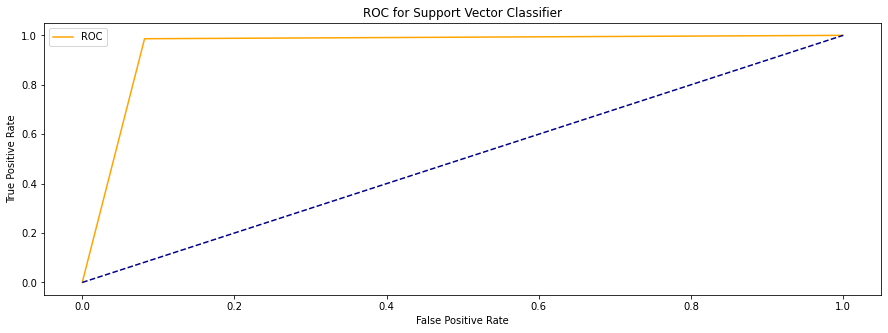

Area under the curve:  0.9522184300341296


In [585]:
# Loading the probability values for positive class
y_prob = svm_tuned.predict_proba(x_trainz)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_svm_tuned_test, pos_label=1)
# Plotting the ROC curve
plot_roc_curve1(fpr, tpr)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

- From the above plot, we can tell that the AUC is 0.952 which is 95.2% which is really good

### Confusion Matrix

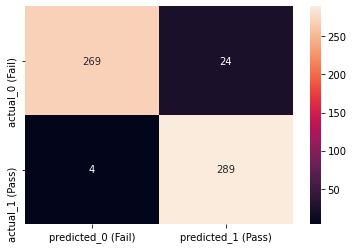

In [586]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, prediction_svm_tuned_test)
df_conf_mat = pd.DataFrame(conf_mat,index=['actual_0 (Fail)', 'actual_1 (Pass)'],columns=['predicted_0 (Fail)', 'predicted_1 (Pass)',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

True Positives (TP): we correctly predicted "Bottom right" True positives (Pass to Predict Pass)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Fail to Predict Fail)

False Positives (FP): we incorrectly predicted "Bottom left" False Positives (a "Type I error") that means the signals had Passed but they were set as Fail. 

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the signals had Failed but they were set as Pass. 

## V) Random Forest Classifier

In [378]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [381]:
param_distributions = {'max_depth': [20,40,60,80,100],
               'min_samples_leaf': [1, 2, 4],
               'n_estimators' : [40], 
                'max_features': ['auto', 'sqrt'], 
                'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100]}

grid = RandomizedSearchCV(rfc,param_distributions,cv=10)
grid.fit(x_trainz,y_train)
grid.best_params_

{'n_estimators': 40,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 100,
 'max_features': 'sqrt',
 'max_depth': 100}

In [475]:
rfc_tuned=RandomForestClassifier(max_depth = 25,min_samples_leaf =2,n_estimators=40,max_features='sqrt',max_leaf_nodes =100)
rfc_tuned.fit(x_trainz,y_train)

RandomForestClassifier(max_depth=25, max_features='sqrt', max_leaf_nodes=100,
                       min_samples_leaf=2, n_estimators=40)

In [476]:
prediction_rfc_tuned_train = rfc_tuned.predict(x_trainz)
prediction_rfc_tuned_test = rfc_tuned.predict(x_testz)

rfc_tunedtrain = metrics.accuracy_score(y_train, prediction_rfc_tuned_train)
rfc_tunedtest = metrics.accuracy_score(y_test, prediction_rfc_tuned_test)

rfc_tuned_precision_train = precision_score(y_train, prediction_rfc_tuned_train)
rfc_tuned_recall_train = recall_score(y_train, prediction_rfc_tuned_train)

rfc_tuned_precision_test = precision_score(y_test, prediction_rfc_tuned_test)
rfc_tuned_recall_test = recall_score(y_test, prediction_rfc_tuned_test)

rfc_tuned_F1 = 2 * (rfc_tuned_precision_test * rfc_tuned_recall_test) / (rfc_tuned_precision_test + rfc_tuned_recall_test)

### K Fold Cross Validation

In [615]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10)
results = cross_val_score(rfc_tuned,x_trainz,y_train, cv=kfold)
print(results,'\n')

print('The mean is:',results.mean(),'\n\n','The standard deviation is:',results.std())

[0.96153846 0.93589744 0.93589744 0.96153846 0.94017094 0.94017094
 0.95299145 0.96581197 0.91880342 0.92735043] 

The mean is: 0.944017094017094 

 The standard deviation is: 0.014981665079451378


### ROC Curve

In [584]:
def plot_roc_curve1(fpr, tpr):
    plt.figure(figsize = (15, 5))
    plt.rc('font', size=10)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Random Forest Classifier')
    plt.legend()
    plt.show()

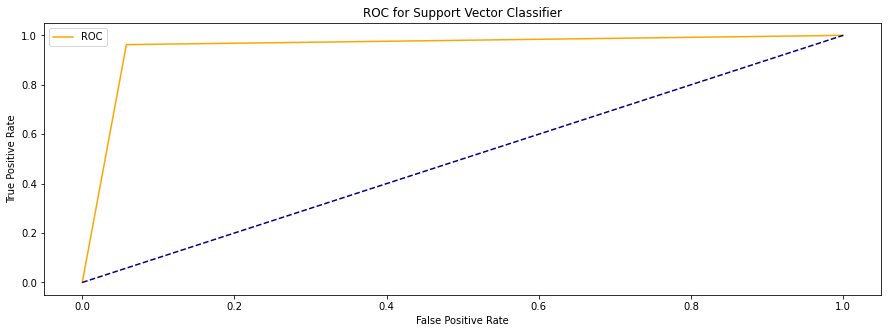

Area under the curve:  0.9522184300341299


In [587]:
# Loading the probability values for positive class
y_prob = rfc_tuned.predict_proba(x_trainz)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_rfc_tuned_test, pos_label=1)
# Plotting the ROC curve
plot_roc_curve1(fpr, tpr)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

- From the above plot, we can tell that the AUC is 0.952 which is 95.2% which is really good

### Confusion Matrix

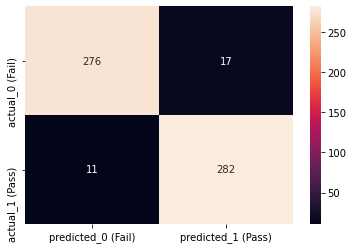

In [588]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, prediction_rfc_tuned_test)
df_conf_mat = pd.DataFrame(conf_mat,index=['actual_0 (Fail)', 'actual_1 (Pass)'],columns=['predicted_0 (Fail)', 'predicted_1 (Pass)',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

True Positives (TP): we correctly predicted "Bottom right" True positives (Pass to Predict Pass)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Fail to Predict Fail)

False Positives (FP): we incorrectly predicted "Bottom left" False Positives (a "Type I error") that means the signals had Passed but they were set as Fail. 

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the signals had Failed but they were set as Pass. 

## VI) Adaboost Classifier

In [479]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

In [548]:
tuned_abc = AdaBoostClassifier(n_estimators = 3000)
tuned_abc.fit(x_trainz,y_train)

AdaBoostClassifier(n_estimators=3000)

In [551]:
prediction_tuned_abc_train = tuned_abc.predict(x_trainz)
prediction_tuned_abc_test = tuned_abc.predict(x_testz)

tuned_abctrain = metrics.accuracy_score(y_train, prediction_tuned_abc_train)
tuned_abctest = metrics.accuracy_score(y_test, prediction_tuned_abc_test)

tuned_abc_precision_train = precision_score(y_train, prediction_tuned_abc_train)
tuned_abc_recall_train = recall_score(y_train, prediction_tuned_abc_train)

tuned_abc_precision_test = precision_score(y_test, prediction_tuned_abc_test)
tuned_abc_recall_test = recall_score(y_test, prediction_tuned_abc_test)

tuned_abc_F1 = 2 * (tuned_abc_precision_test * tuned_abc_recall_test) / (tuned_abc_precision_test + tuned_abc_recall_test)

### K Fold Cross Validation

In [617]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10)
results = cross_val_score(tuned_abc,x_trainz,y_train, cv=kfold)
print(results,'\n')

print('The mean is:',results.mean(),'\n\n','The standard deviation is:',results.std())

[0.86752137 0.91452991 0.9017094  0.88461538 0.88461538 0.8974359
 0.91025641 0.92307692 0.85897436 0.91880342] 

The mean is: 0.8961538461538462 

 The standard deviation is: 0.020676872484449486


### ROC Curve

In [589]:
def plot_roc_curve1(fpr, tpr):
    plt.figure(figsize = (15, 5))
    plt.rc('font', size=10)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Adaboost Classifier')
    plt.legend()
    plt.show()

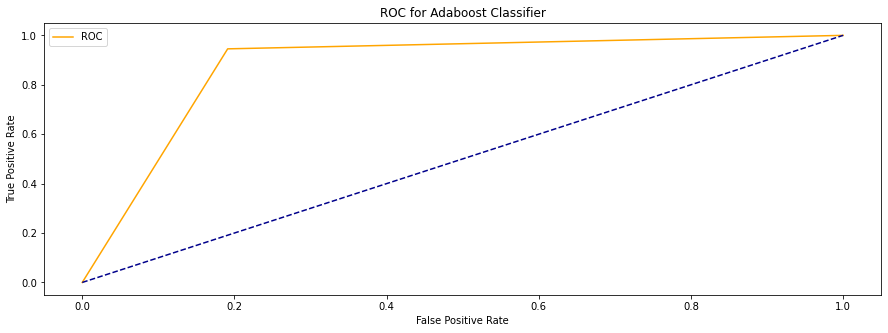

Area under the curve:  0.8771331058020478


In [590]:
# Loading the probability values for positive class
y_prob = tuned_abc.predict_proba(x_trainz)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_tuned_abc_test, pos_label=1)
# Plotting the ROC curve
plot_roc_curve1(fpr, tpr)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

- From the above plot, we can tell that the AUC is 0.877 which is 87.71 % which is really good

### Confusion Matrix

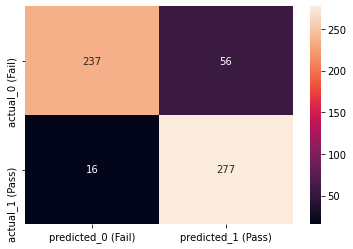

In [591]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, prediction_tuned_abc_test)
df_conf_mat = pd.DataFrame(conf_mat,index=['actual_0 (Fail)', 'actual_1 (Pass)'],columns=['predicted_0 (Fail)', 'predicted_1 (Pass)',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

True Positives (TP): we correctly predicted "Bottom right" True positives (Pass to Predict Pass)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Fail to Predict Fail)

False Positives (FP): we incorrectly predicted "Bottom left" False Positives (a "Type I error") that means the signals had Passed but they were set as Fail. 

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the signals had Failed but they were set as Pass. 

## VII) Stacking Classifier

In [593]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('Decision Tree',PCATreeR),
    ('Logistic Regression', LR_tuned),
    ('KNN', Tuned_knn),
    ('Adaboost', tuned_abc)]

In [594]:
stack = StackingClassifier(estimators=estimators, final_estimator=svm_tuned)
stack.fit(x_trainz, y_train)

StackingClassifier(estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=17,
                                                       max_features=21,
                                                       min_samples_leaf=5,
                                                       random_state=12)),
                               ('Logistic Regression',
                                LogisticRegression(C=11)),
                               ('KNN',
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=3)),
                               ('Adaboost',
                                AdaBoostClassifier(n_estimators=3000))],
                   final_estimator=SVC(C=100, gamma=0.01, probability=True))

In [595]:
prediction_stack_train = stack.predict(x_trainz)
prediction_stack_test = stack.predict(x_testz)

stacktrain = metrics.accuracy_score(y_train, prediction_stack_train)
stacktest = metrics.accuracy_score(y_test, prediction_stack_test)

stack_precision_train = precision_score(y_train, prediction_stack_train)
stack_recall_train = recall_score(y_train, prediction_stack_train)

stack_precision_test = precision_score(y_test, prediction_stack_test)
stack_recall_test = recall_score(y_test, prediction_stack_test)

stack_F1 = 2 * (stack_precision_test * stack_recall_test) / (stack_precision_test + stack_recall_test)

### ROC Curve

In [596]:
def plot_roc_curve1(fpr, tpr):
    plt.figure(figsize = (15, 5))
    plt.rc('font', size=10)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Stacking Classifier')
    plt.legend()
    plt.show()

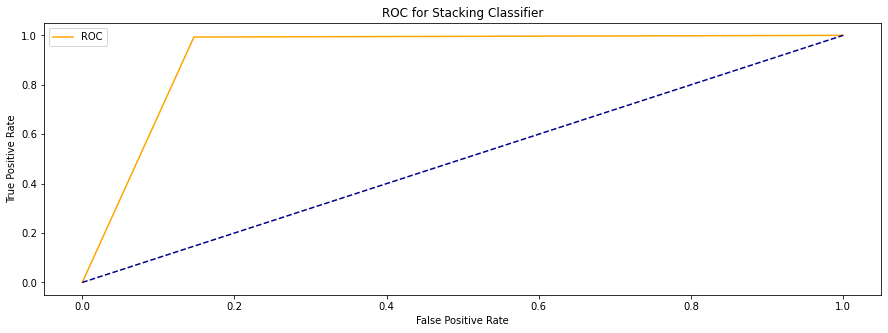

Area under the curve:  0.9232081911262798


In [597]:
# Loading the probability values for positive class
y_prob = stack.predict_proba(x_trainz)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_stack_test, pos_label=1)
# Plotting the ROC curve
plot_roc_curve1(fpr, tpr)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

- From the above plot, we can tell that the AUC is 0.923 which is 92.3 % which is really good

### Confusion Matrix

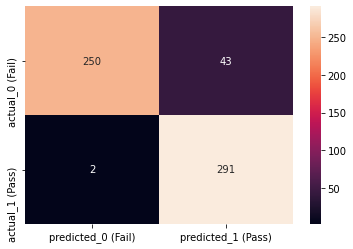

In [598]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, prediction_stack_test)
df_conf_mat = pd.DataFrame(conf_mat,index=['actual_0 (Fail)', 'actual_1 (Pass)'],columns=['predicted_0 (Fail)', 'predicted_1 (Pass)',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

True Positives (TP): we correctly predicted "Bottom right" True positives (Pass to Predict Pass)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Fail to Predict Fail)

False Positives (FP): we incorrectly predicted "Bottom left" False Positives (a "Type I error") that means the signals had Passed but they were set as Fail. 

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the signals had Failed but they were set as Pass. 

## VIII) Bagging Classifier

In [558]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier()

In [561]:
n_estimators =  [1000]
max_samples = [100,200]
parameters = {'n_estimators': n_estimators,'max_samples': max_samples}
grid  = RandomizedSearchCV(bgcl,param_distributions = parameters)
grid.fit(x_trainz,y_train)
grid.best_params_

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 1000, 'max_samples': 200}

In [564]:
tuned_bgcl = BaggingClassifier(n_estimators = 1000, max_samples = 200)
tuned_bgcl.fit(x_trainz,y_train)

BaggingClassifier(max_samples=200, n_estimators=1000)

In [565]:
prediction_tuned_bgcl_train = tuned_bgcl.predict(x_trainz)
prediction_tuned_bgcl_test = tuned_bgcl.predict(x_testz)

tuned_bgcltrain = metrics.accuracy_score(y_train, prediction_tuned_bgcl_train)
tuned_bgcltest = metrics.accuracy_score(y_test, prediction_tuned_bgcl_test)

tuned_bgcl_precision_train = precision_score(y_train, prediction_tuned_bgcl_train)
tuned_bgcl_recall_train = recall_score(y_train, prediction_tuned_bgcl_train)

tuned_bgcl_precision_test = precision_score(y_test, prediction_tuned_bgcl_test)
tuned_bgcl_recall_test = recall_score(y_test, prediction_tuned_bgcl_test)

tuned_bgcl_F1 = 2 * (tuned_bgcl_precision_test * tuned_bgcl_recall_test) / (tuned_bgcl_precision_test + tuned_bgcl_recall_test)

### K Fold Cross Validation

In [619]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10)
results = cross_val_score(tuned_bgcl,x_trainz,y_train, cv=kfold)
print(results,'\n')

print('The mean is:',results.mean(),'\n\n','The standard deviation is:',results.std())

[0.88461538 0.85042735 0.8974359  0.89316239 0.88888889 0.89316239
 0.89316239 0.91452991 0.85897436 0.87606838] 

The mean is: 0.8850427350427349 

 The standard deviation is: 0.01787224244985171


### ROC Curve

In [596]:
def plot_roc_curve1(fpr, tpr):
    plt.figure(figsize = (15, 5))
    plt.rc('font', size=10)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Bagging Classifier')
    plt.legend()
    plt.show()

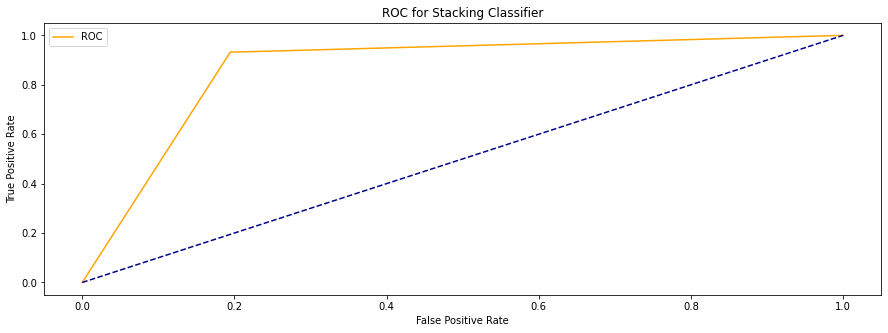

Area under the curve:  0.8686006825938567


In [599]:
# Loading the probability values for positive class
y_prob = tuned_bgcl.predict_proba(x_trainz)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_tuned_bgcl_test, pos_label=1)
# Plotting the ROC curve
plot_roc_curve1(fpr, tpr)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

- From the above plot, we can tell that the AUC is 0.868 which is 86.8 % which is decent

### Confusion Matrix

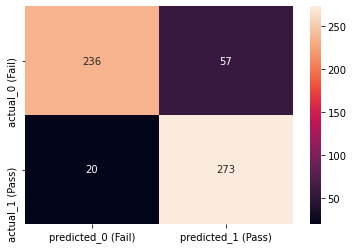

In [600]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, prediction_tuned_bgcl_test)
df_conf_mat = pd.DataFrame(conf_mat,index=['actual_0 (Fail)', 'actual_1 (Pass)'],columns=['predicted_0 (Fail)', 'predicted_1 (Pass)',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

True Positives (TP): we correctly predicted "Bottom right" True positives (Pass to Predict Pass)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Fail to Predict Fail)

False Positives (FP): we incorrectly predicted "Bottom left" False Positives (a "Type I error") that means the signals had Passed but they were set as Fail. 

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the signals had Failed but they were set as Pass. 

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">5.2 Display and compare all the models designed with their train and test accuracies.

In [566]:
resultsDf1 = pd.DataFrame({'Method':['Decision Tree'], 'accuracy_Train': [PCATreeRtrain],'accuracy_Test': [PCATreeRtest],'Precision_Train': [PCATreeR_precision_train],'Precision_Test':[PCATreeR_precision_test],'Recall_Train':[PCATreeR_recall_train],'Recall_Test':[PCATreeR_recall_test],'F1-Score':[PCATreeR_F1]})
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy_Train': [LRtrain],'accuracy_Test': [LRtest],'Precision_Train': [LR_precision_train],'Precision_Test':[LR_precision_test],'Recall_Train':[LR_recall_train],'Recall_Test':[LR_recall_test],'F1-Score':[LR_F1]})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['KNN'], 'accuracy_Train': [Tuned_knntrain],'accuracy_Test': [Tuned_knntest],'Precision_Train': [Tuned_knn_precision_train],'Precision_Test':[Tuned_knn_precision_test],'Recall_Train':[Tuned_knn_recall_train],'Recall_Test':[Tuned_knn_recall_test],'F1-Score':[Tuned_knn_F1]})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['SVM'], 'accuracy_Train': [svm_tunedtrain],'accuracy_Test': [svm_tunedtest],'Precision_Train': [svm_tuned_precision_train],'Precision_Test':[svm_tuned_precision_test],'Recall_Train':[svm_tuned_recall_train],'Recall_Test':[svm_tuned_recall_test],'F1-Score':[svm_tuned_F1]})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['Random Forest Classifier'], 'accuracy_Train': [rfc_tunedtrain],'accuracy_Test': [rfc_tunedtest],'Precision_Train': [rfc_tuned_precision_train],'Precision_Test':[rfc_tuned_precision_test],'Recall_Train':[rfc_tuned_recall_train],'Recall_Test':[rfc_tuned_recall_test],'F1-Score':[rfc_tuned_F1]})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['Adaboost Classifier'], 'accuracy_Train': [rfc_tunedtrain],'accuracy_Test': [tuned_abctest],'Precision_Train': [tuned_abc_precision_train],'Precision_Test':[tuned_abc_precision_test],'Recall_Train':[tuned_abc_recall_train],'Recall_Test':[tuned_abc_recall_test],'F1-Score':[tuned_abc_F1]})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['Stacking Classifier'], 'accuracy_Train': [stacktrain],'accuracy_Test': [stacktest],'Precision_Train': [stack_precision_train],'Precision_Test':[stack_precision_test],'Recall_Train':[stack_recall_train],'Recall_Test':[stack_recall_test],'F1-Score':[stack_F1]})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['Bagging Classifier'], 'accuracy_Train': [tuned_bgcltrain],'accuracy_Test': [tuned_bgcltest],'Precision_Train': [tuned_bgcl_precision_train],'Precision_Test':[tuned_bgcl_precision_test],'Recall_Train':[tuned_bgcl_recall_train],'Recall_Test':[tuned_bgcl_recall_test],'F1-Score':[tuned_bgcl_F1]})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf])
resultsDf1

,Method,accuracy_Train,accuracy_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,F1-Score
0,Decision Tree,0.932479,0.824232,0.909385,0.800633,0.960684,0.863481,0.830870
0,Logistic Regression,0.713248,0.694539,0.710549,0.687500,0.719658,0.713311,0.700168
0,KNN,0.911111,0.834471,0.849057,0.751282,1.000000,1.000000,0.857980
0,SVM,0.999573,0.952218,0.999146,0.923323,1.000000,0.986348,0.953795
0,Random Forest Classifier,0.997863,0.952218,0.996590,0.943144,0.999145,0.962457,0.952703
0,Adaboost Classifier,0.997863,0.877133,1.000000,0.831832,1.000000,0.945392,0.884984
0,Stacking Classifier,0.999145,0.923208,1.000000,0.871257,0.998291,0.993174,0.928230
0,Bagging Classifier,0.934615,0.868601,0.909750,0.827273,0.964957,0.931741,0.876404


- The Train accuracies of all models are very high, except Logistic regression which has train accuracy at 71% only.

- From the test accuracies we can see that all models are not overfit except for Adaboost.

- Recall for all models are good except for Decision tree and Logistic Regression.

- Precision for all models are good except for Logistic Regression and KNN. 

- In this case, for manufacturing industry, the we prefer Recall over Precision, hence high recall models are preferred over low recall models

- Type I error (FP) for this model will consitute those production entities which actually were pass, but we predict them as fail. Such entities, in later stages (Quality control) can be corrected as pass.

- Type II error (FN) constitutes those production entities which actually failed, but we predict them as pass. This is what the manufacturing process wants to minimize.

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">5.3 Select the final best trained model along with your detailed comments for selecting this model.

- We can compromise on precision (Out of all predicted failed entity, how much were we able to identify) because we focus on reducing Type II error (FN) (those production entities which actually failed, but we predict them as pass) rather than Type I error (FP) (those production entities which actually were pass, but we predict them as fail)

- From the given models, we will choose Support Vector Machine Classifier because it has the highest Recall and F1-score. 

- The test accuracy after K Fold cross validation is 0.95811 and the Standard Deviation is 0.0152 which is pretty low. Thus, we can say that this model will perform well between 91.96% (0.95 - 2 * 0.0152) and 98.04% (0.9588 +2 * 0.0152) in 95% confidence interval. 

- As this model has low bias, low standard deviation, high Recall, high F1 score. Hence, this model would be the final best trained model. 

## Creating Pipeline for the model

In [620]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [622]:
pipeline = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=40)),('clf', SVC(C = 100 ,gamma = 0.01, kernel = 'rbf',probability=True))])
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=40)),
                ('clf', SVC(C=100, gamma=0.01, probability=True))])

In [625]:
prediction_pipeline_train = pipeline.predict(x_train)
prediction_pipeline_test = pipeline.predict(x_test)

pipelinetrain = metrics.accuracy_score(y_train, prediction_pipeline_train)
pipelinetest = metrics.accuracy_score(y_test, prediction_pipeline_test)

pipeline_precision_train = precision_score(y_train, prediction_pipeline_train)
pipeline_recall_train = recall_score(y_train, prediction_pipeline_train)

pipeline_precision_test = precision_score(y_test, prediction_pipeline_test)
pipeline_recall_test = recall_score(y_test, prediction_pipeline_test)

pipeline_F1 = 2 * (pipeline_precision_test * pipeline_recall_test) / (pipeline_precision_test + pipeline_recall_test)

### Classification Report

In [627]:
resultsDf2 = pd.DataFrame({'Method':['Pipeline'], 'accuracy_Train': [pipelinetrain],'accuracy_Test': [pipelinetest],'Precision_Train': [pipeline_precision_train],'Precision_Test':[pipeline_precision_test],'Recall_Train':[pipeline_recall_train],'Recall_Test':[pipeline_recall_test],'F1-Score':[pipeline_F1]})
resultsDf2

,Method,accuracy_Train,accuracy_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,F1-Score
0,Pipeline,0.999573,0.952218,0.999146,0.923323,1.0,0.986348,0.953795


- The classification report is the same as the SVC classification report and the accuracy, precision, recall and f1 score are all the same and there is no difference from the non pipeline classification report

### ROC Curve

In [628]:
def plot_roc_curve1(fpr, tpr):
    plt.figure(figsize = (15, 5))
    plt.rc('font', size=10)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Pipeline')
    plt.legend()
    plt.show()

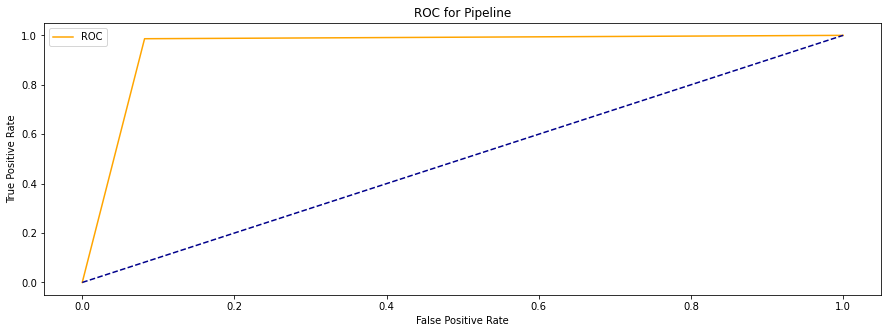

Area under the curve:  0.9522184300341296


In [630]:
# Loading the probability values for positive class
y_prob = pipeline.predict_proba(x_train)[:,1]
# Calculating False positive rate, true positive rate and the threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_pipeline_test, pos_label=1)
# Plotting the ROC curve
plot_roc_curve1(fpr, tpr)
# Calculating the area under the curve
print("Area under the curve: ", metrics.auc(fpr, tpr))

- From the above plot, we can tell that the AUC is 0.9522 which is 96.22 % which is really good

### Confusion Matrix

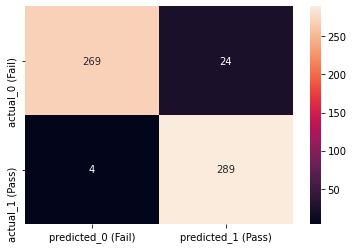

In [631]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, prediction_pipeline_test)
df_conf_mat = pd.DataFrame(conf_mat,index=['actual_0 (Fail)', 'actual_1 (Pass)'],columns=['predicted_0 (Fail)', 'predicted_1 (Pass)',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

True Positives (TP): we correctly predicted "Bottom right" True positives (Pass to Predict Pass)

True Negatives (TN): we correctly predicted "Top left" True Negatives (Fail to Predict Fail)

False Positives (FP): we incorrectly predicted "Bottom left" False Positives (a "Type I error") that means the signals had Passed but they were set as Fail. 

False Negatives (FN): we incorrectly predicted "Top right" False Negatives (a "Type II error") that means the signals had Failed but they were set as Pass. 

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">5.4 Pickle the selected model for future use.

In [632]:
import pickle
saved_model = pickle.dumps(pipeline)

In [633]:
# load the model from disk
loaded_model = pickle.loads(saved_model)

- The best model is pickled for future use and in production

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">5.5 Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results.

In [710]:
future=pd.read_excel('Future_predictions.xlsx')

In [711]:
future.dtypes

Time    datetime64[ns]
0              float64
1              float64
2              float64
3              float64
             ...      
585            float64
586            float64
587            float64
588            float64
589            float64
Length: 591, dtype: object

In [731]:
# picking the  columns selected after original Data's EDA.
columns = [int(i) for i in dfmodel.columns[:-1]] 
new_df=future[columns]

#filling in missing values
for feature in new_df.columns:
    new_df[feature].fillna(0,inplace=True)    
    new_df[feature].replace(0,new_df[feature].median(),inplace=True)
   
 #Scaling the new data
    from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = scaler.fit_transform(new_df)

D:\Anaconda\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
D:\Anaconda\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [732]:
predict=loaded_model.predict(new_df) 
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

- The predictions were made with Support Vector Machine Classifier which was pickled. The accuracy of the model, recall, F1 score is very high and has given output prediction as Fail.

<font size="5"><p style="color:black"> <b> 6. Conclusion and improvisation: </p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">6.1 Write your conclusion on the results.

<font size="3"> 

- The given Dataset had 1567 rows and 592 columns  wit total 927664 datapoints. This dataset suffered from Curse of Dimensionality.

- There were Missing Values, Outliers and  zero/low variance columns in the data and they had to be treated as such.

- It was very important to handle to reduce the dimensions of data without losing any information. We used various techniques (PCA, Coeffieent of Variation less than 1, etc) for this dimensionality reduction.

- The SVM has average accuracy of 0.95811 and the Standard Deviation is 0.0152 which is pretty low. Thus, we can say that this model will perform well between 91.96% (0.95 - 2 * 0.0152) and 98.04% (0.9588 +2 * 0.0152) in 95% confidence interval.   
    
- We chose Support Vector Machine Classifier Model out of all 8 models that we built from this data. Support Vector Machine Classifier has low bias, low standard deviation, high Recall, high F1 score. Hence, this model would be the final best trained model.
    
- The model is streamline with Pipelines. The prediction of the missing values yielded to all outputs predicted as "Fail". As this model has high accuracy, the predicted output should be correct. </font>
   